# Cancer Hospital Records

In [1]:
# importing libraries
import datetime as dt
import matplotlib.pyplot as plt     
import matplotlib.ticker as ticker                   
import missingno as msno                    
import numpy as np
import os
import pandas as pd
import sys
from IPython.display import Markdown as md
from pandas.plotting import scatter_matrix  

sys.path.append("../src")
from utility import (
    dataset_dimensions, column_missing_values, column_unique_values, 
    numeric_categorical_data, lowercase_column_name, column_to_datetime,
    number_unique_values, missing_in_columns, medical_speciality
)

# Loading the dataset

In [2]:
# allow showing more rows and columns when using the method df.head()
pd.set_option("display.max_rows", 300, "display.max_columns", 300)

# open original file converted to csv format
rhc_orig = pd.read_csv("../data/pacigeral_jun22.csv", encoding="latin_1", low_memory=False)

# make a copy of the dataset
rhc = rhc_orig.copy()

# Exploratory data analysis (EDA)

Let's inspect five random data points of the dataset.

In [3]:
rhc.head(3)

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,T,N,M,PT,PN,PM,S,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,OUTRACLA,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,QUIMIOANT,HORMOANT,TMOANT,IMUNOANT,OUTROANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,CICISUBGRU,FAIXAETAR,LATERALI,INSTORIG,DRS,RRAS,PERDASEG,ERRO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABILIT1,HABILIT2,CIDADEH
0,9,90,2,PB,SP,3518701,GUARUJA,9,2009-09-30,24,1,2009-09-30,3,C060,C06,MUCOSA DA BOCHECHA,80703,CARCINOMA ESCAMOCELULAR SOE,II,II,2,0,0,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2009-12-15,8,F,F,J,J,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2010-05-30,3,0.0,76.0,76.0,2009,NaN,NaN,NaN,70+,8,NaN,DRS 04 SANTOS,7,0,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3518701,80703,CARCINOMA ESCAMOCELULAR SOE,1,1,1,Guaruj
1,9,88,1,SP,SP,3518701,GUARUJA,9,2009-05-09,24,1,2009-05-28,3,C619,C61,PROSTATA,81403,ADENOCARCINOMA SOE,II,II,2C,0,0,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2009-06-01,8,C,C,J,J,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2010-06-12,4,19.0,23.0,4.0,2009,NaN,NaN,NaN,70+,8,NaN,DRS 04 SANTOS,7,0,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3518701,81403,ADENOCARCINOMA SOE,1,1,1,Guaruj
2,9,90,1,RJ,SP,3518701,GUARUJA,9,2011-09-21,24,2,2011-08-23,3,C619,C61,PROSTATA,81403,ADENOCARCINOMA SOE,II,II,2,0,0,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2011-09-22,8,I,I,J,J,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2013-04-12,1,29.0,1.0,30.0,2011,NaN,NaN,NaN,70+,8,NaN,DRS 04 SANTOS,7,1,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3518701,81403,ADENOCARCINOMA SOE,1,1,1,Guaruj


#### General information about the dataset

We can separate the dataset by numerical and categorical features.

In [4]:
numeric_categorical_data(rhc)

Number of numerical variables: 59

Number of categorical variables: 40


#### Number of unique values for each feature present in the dataset

In [5]:
number_unique_values(rhc)


Total number of rows:      1085380

Total number of features: 99



,feature,n_unique_values,feature,n_unique_values,feature,n_unique_values,feature,n_unique_values
0,ESCOLARI,6,PM,9,OUTROS,2,CICISUBGRU,48.0
1,IDADE,110,S,1,NENHUMANT,2,FAIXAETAR,8.0
2,SEXO,2,G,6,CIRURANT,2,LATERALI,4.0
3,UFNASC,29,LOCALTNM,5,RADIOANT,2,INSTORIG,225.0
4,UFRESID,28,IDMITOTIC,4,QUIMIOANT,1,DRS,17.0
5,IBGE,3050,PSA,5,HORMOANT,1,RRAS,18.0
6,CIDADE,2948,GLEASON,5,TMOANT,1,PERDASEG,2.0
7,CATEATEND,4,OUTRACLA,6927,IMUNOANT,1,ERRO,1.0
8,DTCONSULT,8341,META01,70,OUTROANT,1,DTRECIDIVA,7701.0
9,CLINICA,40,META02,68,NENHUMAPOS,2,RECNENHUM,2.0


#### Features with missing values

Let's show the total number missing values for each feature.

In [6]:
# total number of null values, if they are present
missing_in_columns(rhc)

Features with missing values:



DESCMORFO           4
PT             613853
PN             619334
PM             646299
OUTRACLA      1019326
META01         939153
META02        1038293
META03        1069173
META04        1080342
DTTRAT          88092
CONSDIAG         5001
TRATCONS        91484
DIAGTRAT        91836
CICI          1056609
CICIGRUP      1056609
CICISUBGRU    1056609
INSTORIG      1084798
DRS             77176
DTRECIDIVA     971423
REC01         1014755
REC02         1063828
REC03         1078152
REC04         1085380
dtype: int64

We can see that some features have lots of missing values, but given the characteristics of the dataset, each case must be analyzed separately.

We can also visualize the missing values, in a more intuitive way, using the library `missingno`.

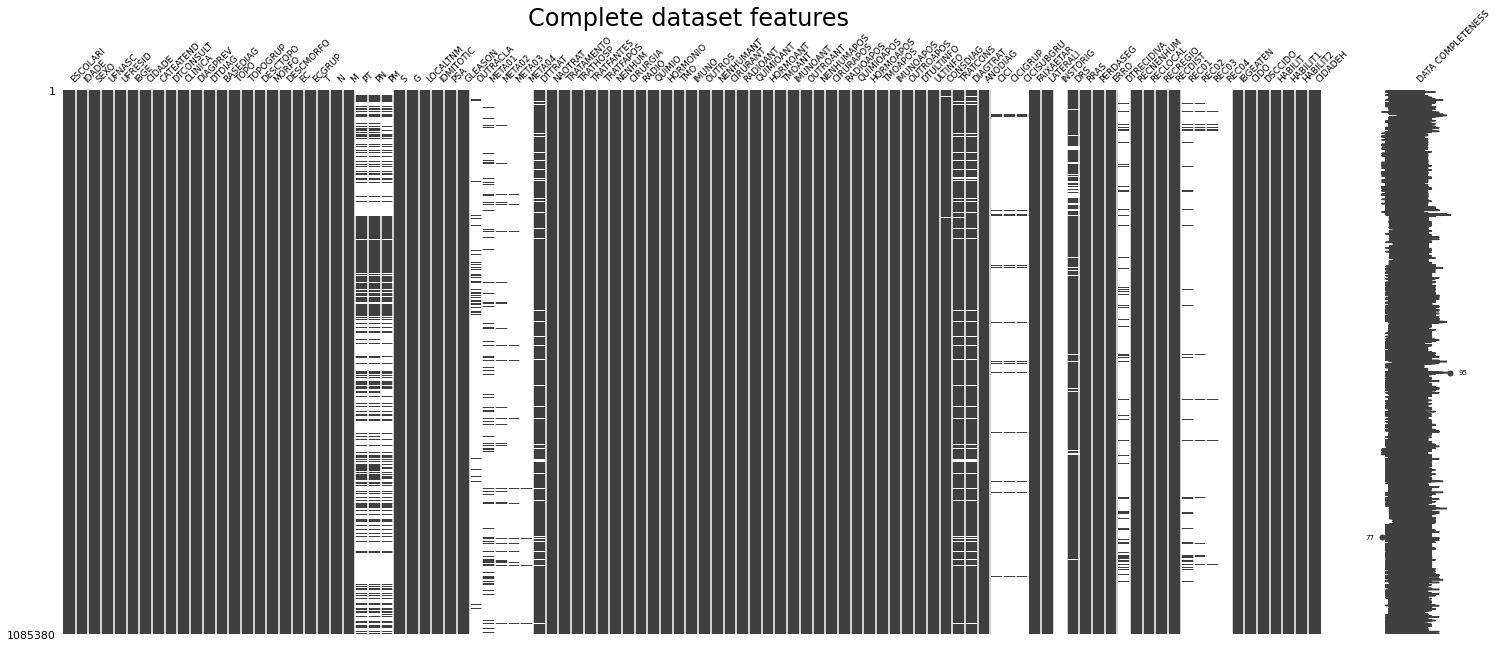

In [7]:
# visualize missing value matrix for the complete dataset
msno.matrix(rhc, labels=True, fontsize=9)
plt.title("Complete dataset features ", fontsize=24)
plt.show()

The white lines in the previous plot represent mising values. Some rows like (`PT`, `PN`, `PM`), (`DTTRAT`, `TRATCONS`, `DIAGTRAT`), and (`CICI`, `CICIGRUP`, `CICISUBGRUP`), present missing values in common rows.

Since we already know which features have missing values we can take a closer look on them with `missingno`.

In [8]:
# create a new dataframe containing only features with missing values
miss_df = rhc[['IDADE', 'DESCMORFO','PT','PN' ,'PM','OUTRACLA','META01','META02','META03','META04',        
               'DTTRAT','DTULTINFO','TRATCONS','DIAGTRAT','CICI','CICIGRUP','CICISUBGRU',    
               'INSTORIG','DRS','DTRECIDIVA','REC01','REC02','REC03','REC04','CIDO','DSCCIDO']]

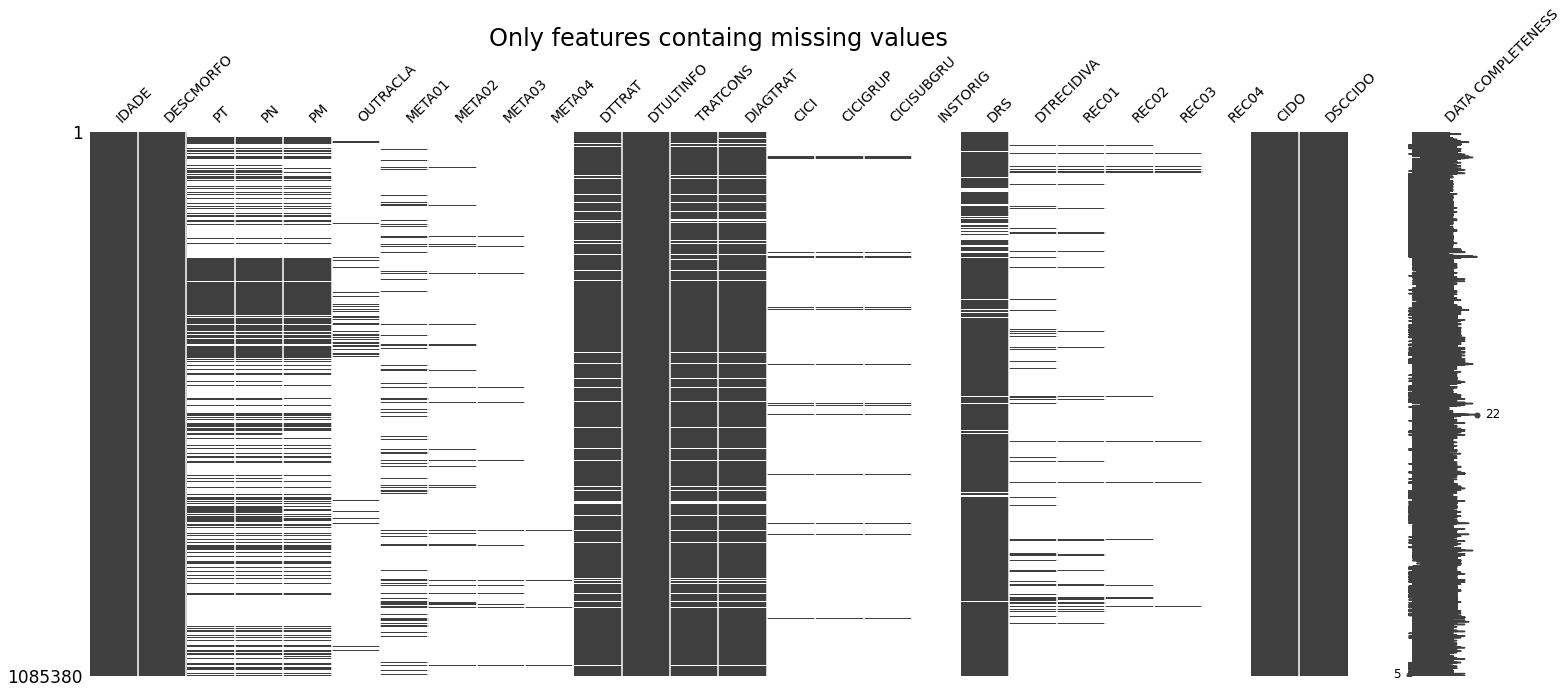

In [9]:
# visualize missing value matrix only for features with missing values
msno.matrix(miss_df, labels=True, fontsize=14)
plt.title("Only features containg missing values", fontsize=24)
plt.show()

#### Converting feature names to lowercase

In [10]:
lowercase_column_name(rhc)
lowercase_column_name(rhc_orig)

#### Converting a date from object to datetime format

Let's create a new columns containing converted datetime format from its object values.

The following features contain dates:
* `dtconsult`
* `dtdiag`
* `dtultinfo` 
* `dtrecidiva` 
* `dttrat`

The date format (2007-01-19) follows the sequence year (4 digits) - month (2 digits) - year (2 digits).

In a first approximation, we can only use the year of registration and create new columns in the dataset with this new information.

The new columns to be created are:
* `year_consult`
* `year_diag`
* `year_ultinfo` 
* `year_recidiva`
* `year_trat`

In [11]:
column_to_datetime(rhc, ['dtconsult', 'dtdiag', 'dtultinfo', 'dtrecidiva', 'dttrat'])

# create a new column containing only the year
rhc['year_consult'] = rhc['dtconsult'].dt.year
rhc['year_diag'] = rhc['dtdiag'].dt.year
rhc['year_ultinfo'] = rhc['dtultinfo'].dt.year
rhc['year_recidiva'] = rhc['dtrecidiva'].dt.year
rhc['year_trat'] = rhc['dttrat'].dt.year

# convert year to integer
rhc['year_consult'] = rhc['year_consult'].astype('Int64')
rhc['year_diag'] = rhc['year_diag'].astype('Int64')
rhc['year_ultinfo'] = rhc['year_ultinfo'].astype('Int64')
rhc['year_recidiva'] = rhc['year_recidiva'].astype('Int64')
rhc['year_trat'] = rhc['year_trat'].astype('Int64')

The attribute `year_recidiva` is only filled in case of recurrence of the disease. The unfilled fields appear as `NaN`. 

In [12]:
# visualize modified first lines
rhc.head(3)

,escolari,idade,sexo,ufnasc,ufresid,ibge,cidade,cateatend,dtconsult,clinica,diagprev,dtdiag,basediag,topo,topogrup,desctopo,morfo,descmorfo,ec,ecgrup,t,n,m,pt,pn,pm,s,g,localtnm,idmitotic,psa,gleason,outracla,meta01,meta02,meta03,meta04,dttrat,naotrat,tratamento,trathosp,tratfantes,tratfapos,nenhum,cirurgia,radio,quimio,hormonio,tmo,imuno,outros,nenhumant,cirurant,radioant,quimioant,hormoant,tmoant,imunoant,outroant,nenhumapos,cirurapos,radioapos,quimioapos,hormoapos,tmoapos,imunoapos,outroapos,dtultinfo,ultinfo,consdiag,tratcons,diagtrat,anodiag,cici,cicigrup,cicisubgru,faixaetar,laterali,instorig,drs,rras,perdaseg,erro,dtrecidiva,recnenhum,reclocal,recregio,recdist,rec01,rec02,rec03,rec04,ibgeaten,cido,dsccido,habilit,habilit1,habilit2,cidadeh,year_consult,year_diag,year_ultinfo,year_recidiva,year_trat
0,9,90,2,PB,SP,3518701,GUARUJA,9,2009-09-30,24,1,2009-09-30,3,C060,C06,MUCOSA DA BOCHECHA,80703,CARCINOMA ESCAMOCELULAR SOE,II,II,2,0,0,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2009-12-15,8,F,F,J,J,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2010-05-30,3,0.0,76.0,76.0,2009,NaN,NaN,NaN,70+,8,NaN,DRS 04 SANTOS,7,0,0,NaT,1,0,0,0,NaN,NaN,NaN,NaN,3518701,80703,CARCINOMA ESCAMOCELULAR SOE,1,1,1,Guaruj,2009,2009,2010,<NA>,2009
1,9,88,1,SP,SP,3518701,GUARUJA,9,2009-05-09,24,1,2009-05-28,3,C619,C61,PROSTATA,81403,ADENOCARCINOMA SOE,II,II,2C,0,0,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2009-06-01,8,C,C,J,J,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2010-06-12,4,19.0,23.0,4.0,2009,NaN,NaN,NaN,70+,8,NaN,DRS 04 SANTOS,7,0,0,NaT,1,0,0,0,NaN,NaN,NaN,NaN,3518701,81403,ADENOCARCINOMA SOE,1,1,1,Guaruj,2009,2009,2010,<NA>,2009
2,9,90,1,RJ,SP,3518701,GUARUJA,9,2011-09-21,24,2,2011-08-23,3,C619,C61,PROSTATA,81403,ADENOCARCINOMA SOE,II,II,2,0,0,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2011-09-22,8,I,I,J,J,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2013-04-12,1,29.0,1.0,30.0,2011,NaN,NaN,NaN,70+,8,NaN,DRS 04 SANTOS,7,1,0,NaT,1,0,0,0,NaN,NaN,NaN,NaN,3518701,81403,ADENOCARCINOMA SOE,1,1,1,Guaruj,2011,2011,2013,<NA>,2011


#### State 

* birth state: `ufnasc`
* residence state: `ufresid`

In [13]:
# birth states
rhc['ufnasc'].value_counts(normalize=True)

uf_nasc = rhc['ufnasc'].value_counts(normalize=True)[:1]
nasc = uf_nasc.to_string(dtype=False).split()
md(f"About {round(float(nasc[1])*100)}% of patients were born in the state of {nasc[0]}.")

About 65% of patients were born in the state of SP.

In [14]:
# residence states 
uf_resid = rhc['ufresid'].value_counts(normalize=True)[:1]
resid = uf_resid.to_string(dtype=False).split()
md(f"About {round(float(resid[1])*100)}% of patients live in the state of {resid[0]}.")

About 93% of patients live in the state of SP.

From the data, it is not possible to know whether the declared residence is permanent or occurs only during the treatment period.

In [15]:
# counts for the entries in the column `s` 
rhc['s'].value_counts()

8    1085380
Name: s, dtype: int64

All entries in column `s` have the same value 8, which according to the information in the database, means "not applicable". The `s` column (serum tumor markers) is reserved for recording germ cell tumors in the testis.

#### Patient's level of education

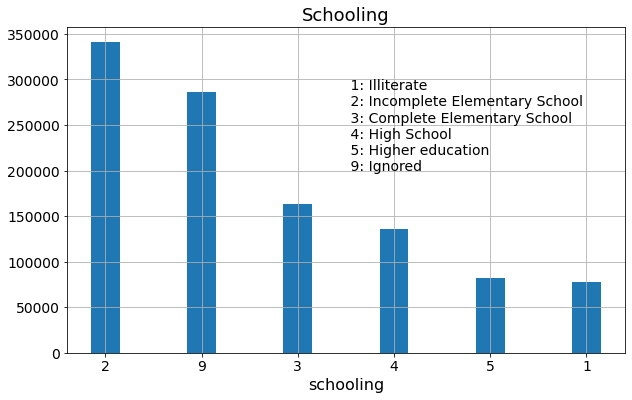

In [16]:
# schooling
rhc['escolari'].value_counts(normalize=False).plot(kind='bar',stacked=True, width = 0.3, rot=0, fontsize=14,figsize=(10,6))
plt.xlabel('schooling', fontsize=16)
plt.text(2.5, 200000,' 1: Illiterate\n 2: Incomplete Elementary School\n 3: Complete Elementary School\n 4: High School\n 5: Higher education\n 9: Ignored ', fontsize = 14)
plt.title("Schooling", fontsize=18)
plt.grid()
plt.show()

#### Age and gender

The number of men and women in the database is pretty much the same.

The ages have a uniform distribution for the two gender included in the dataset.

The incidence of cancer in women is higher than in men from 21 to 52 years. From 55 to 80 years this behavior reverses and the cancer incidence in men is greater (see figure below).

In [17]:
# gender proportion
rhc['sexo'].value_counts(normalize=True)

2    0.501786
1    0.498214
Name: sexo, dtype: float64

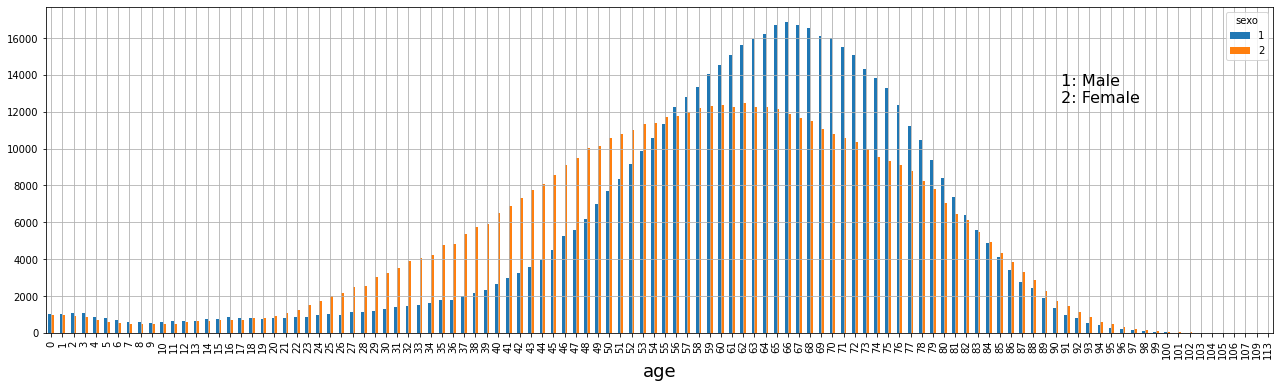

In [18]:
# age and gender trends
rhc.groupby(['idade','sexo']).size().unstack().plot(kind='bar',stacked=False, rot=90, figsize=(22,6))
plt.text(90, 12500,' 1: Male\n 2: Female', fontsize = 16)
plt.xlabel("age", fontsize=18)
plt.grid()
plt.show()

#### City

The figure below shows only cities with more than 10% of presence in the dataset. 

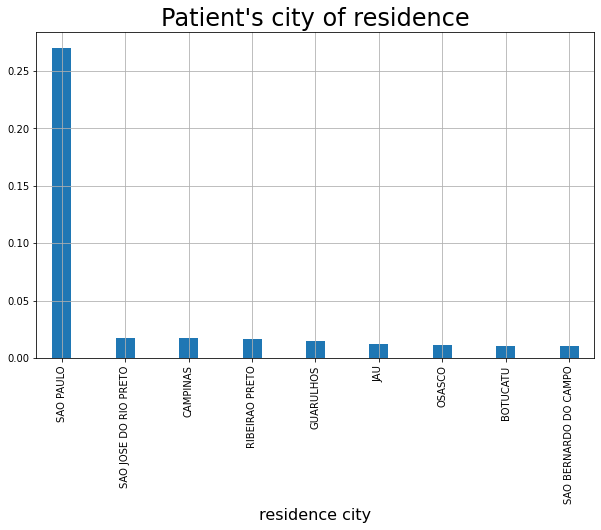

In [19]:
# residence city
city =rhc_orig['cidade'].value_counts(normalize=True)
city.sort_values(ascending=False)

most_frequent_cities = city[city > 0.01]
most_frequent_cities.plot.bar(width=0.3, figsize=(10,6))
plt.xlabel('residence city', fontsize=16)
plt.title("Patient's city of residence", fontsize=24)
plt.grid()
plt.show()

#### Service category

A lot of entries are listed as "no information" available.

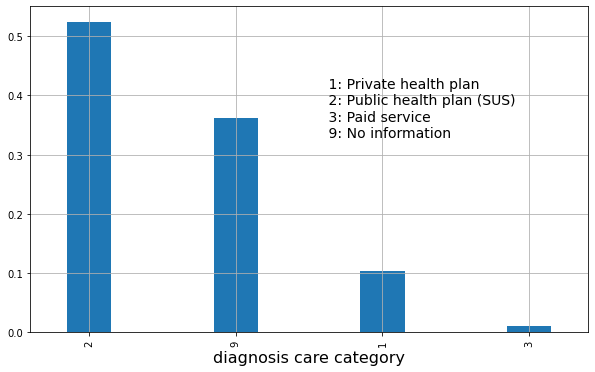

In [20]:
# care category
cateatend = rhc['cateatend'].value_counts(normalize=True)
plt.xlabel('diagnosis care category', fontsize=16)
cateatend.plot.bar(width=0.3, figsize=(10,6))
plt.text(1.6, 0.33,' 1: Private health plan\n 2: Public health plan (SUS)\n 3: Paid service\n 9: No information', fontsize = 14)
plt.grid()
plt.show()

#### Date of the first medical appointment

The RHC database has been officially registering new cases since 2000.


There is a linear increase in the number of cases and then a decrease is observed. According to the [FOSP website](http://www.fosp.saude.sp.gov.br:443/epidemiologia/docs/Dados_de_Cancer.pdf), the lowest values observed in later years are

> "_due to the fact that there is a wait of at least one year for the inclusion of the case in the database, this being the time established to obtain a greater number of information about the tumor, the treatment performed and the patient's evolution after the therapeutics, thus ensuring greater completeness and
data quality. However, this does not means that the number of cancer cases is decreasing_".

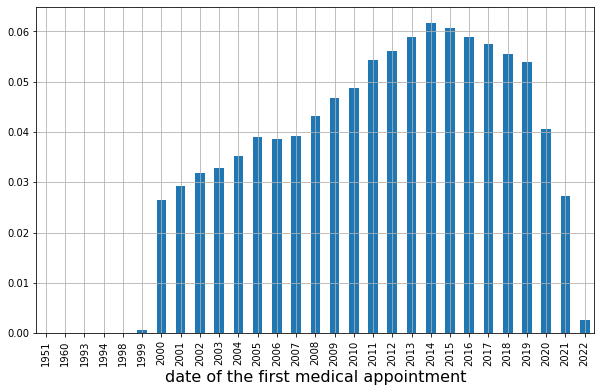

In [21]:
# first consultation date
year_consult = rhc['year_consult'].value_counts(normalize=True).sort_index(ascending=True)
plt.xlabel('date of the first medical appointment', fontsize=16)
year_consult.plot.bar(figsize=(10,6))
plt.grid()
plt.show()

We can also use `datetime` to compare the first two month of each year in the dataset.

In [22]:
# create new columns for the year and month of the first consultation
rhc['year_consult'] = rhc['dtconsult'].dt.year
rhc['month_consult'] = rhc['dtconsult'].dt.month

In [23]:
# create a new dataframe containing only data from january(1) and february(2) 
jan_feb_consult = rhc['dtconsult'].dt.month.between(1,2)
df_jan_feb_consult = rhc.loc[jan_feb_consult]

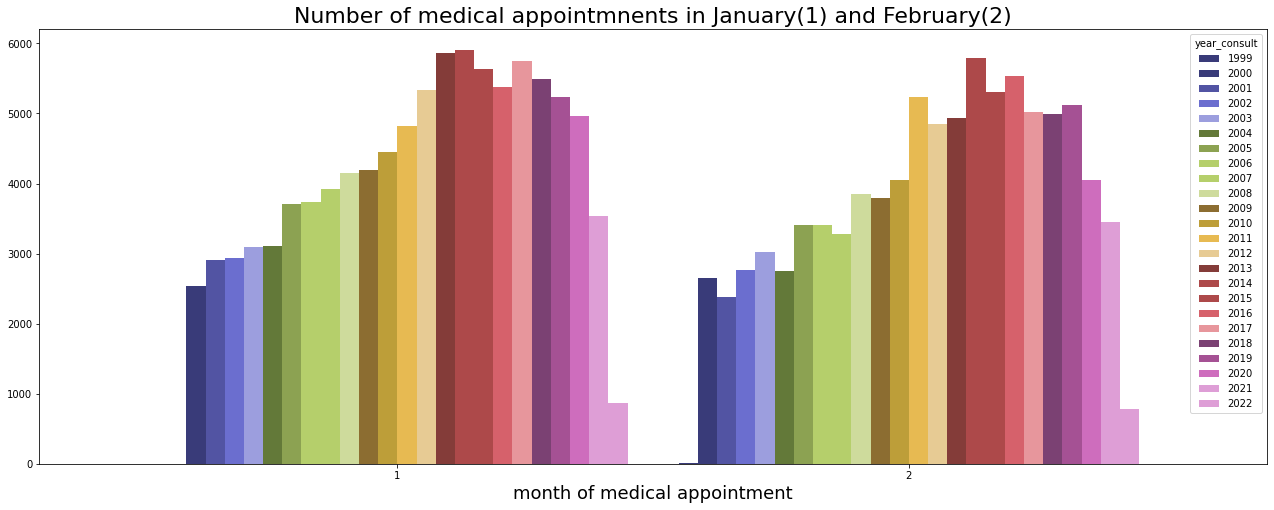

In [24]:
# grouping number o medical appointments during january an february since 2000
df_jan_feb_consult.groupby(['month_consult', 'year_consult']).size().unstack().plot(kind='bar', width=.9, rot=0, stacked=False, figsize=(22,8), colormap='tab20b')
plt.title("Number of medical appointmnents in January(1) and February(2)", fontsize=22)
plt.xlabel("month of medical appointment", fontsize=18)
plt.show()

#### Medical specialty of the first care

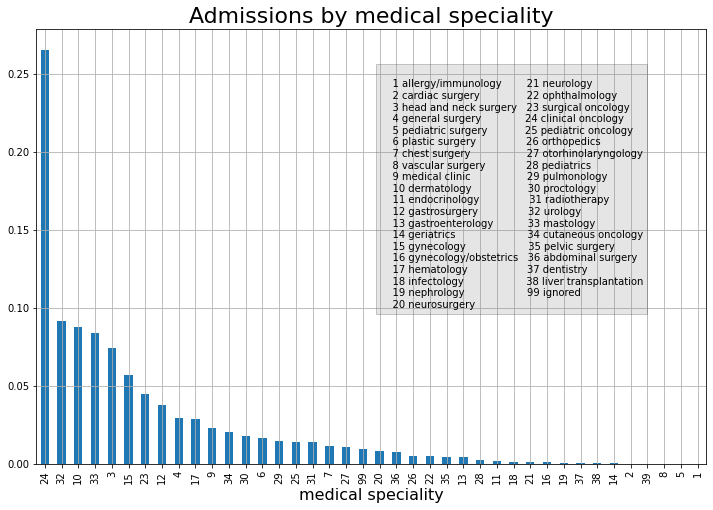

In [34]:
# medical speciality counts
legend_text = medical_speciality()

clinica = rhc['clinica'].value_counts(normalize=True)
clinica.plot.bar(figsize=(12,8))
plt.text(20, 0.1,f'{legend_text}', fontsize = 10, bbox=dict(facecolor='gray', alpha=0.2))
plt.xlabel('medical speciality', fontsize=16)
plt.title("Admissions by medical speciality", fontsize=22)
plt.grid()
plt.show()

#### Medical speciality $\times$ gender

We can compare the medical speciality of the first care with the patient's gender.

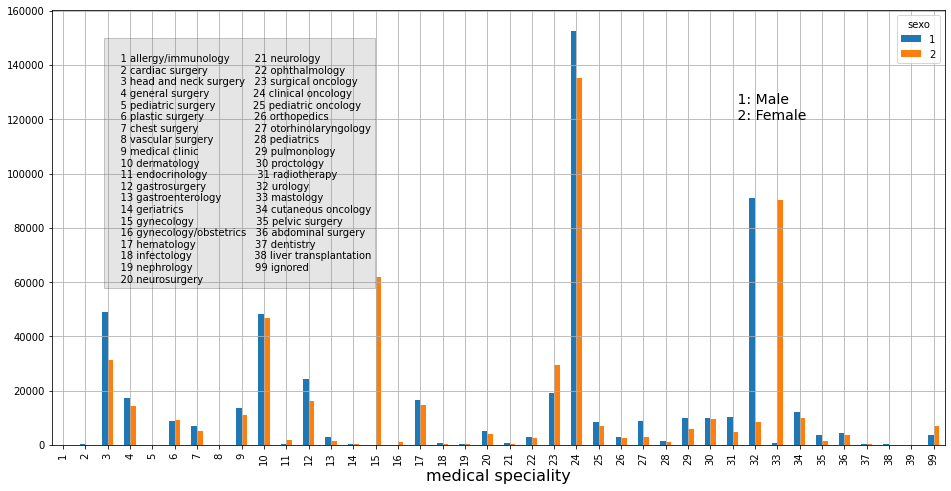

In [27]:
# medical speciality group by gender
rhc.groupby(['clinica', 'sexo']).size().unstack().plot(kind='bar',stacked=False, rot=90, figsize=(16,8))
plt.text(30, 120000,' 1: Male\n 2: Female', fontsize = 14)
plt.text(2, 60000,f'{legend_text}', fontsize = 10, bbox=dict(facecolor='gray', alpha=0.2))
plt.xlabel('medical speciality', fontsize=16)
plt.grid()
plt.show()

#### Medical speciality $\times$ age

In the following three figures, the distribution of the age group by medical speciality can be explored.

For example:
* At medical speciality 10, **dermatology**, the number of entries by gender is similar and the age group peaks at around 74 years.
* At medical speciality 32, **urology**, the predominance of cases is male and the peak is between 66 to 67 years.
* At medical speciality 33, **mastology**, the predominance of cases is female and the peak is located around 49 to 53 years.

Although urology and mastology are more gender-specific we can observe the difference in the age groups of the patients.

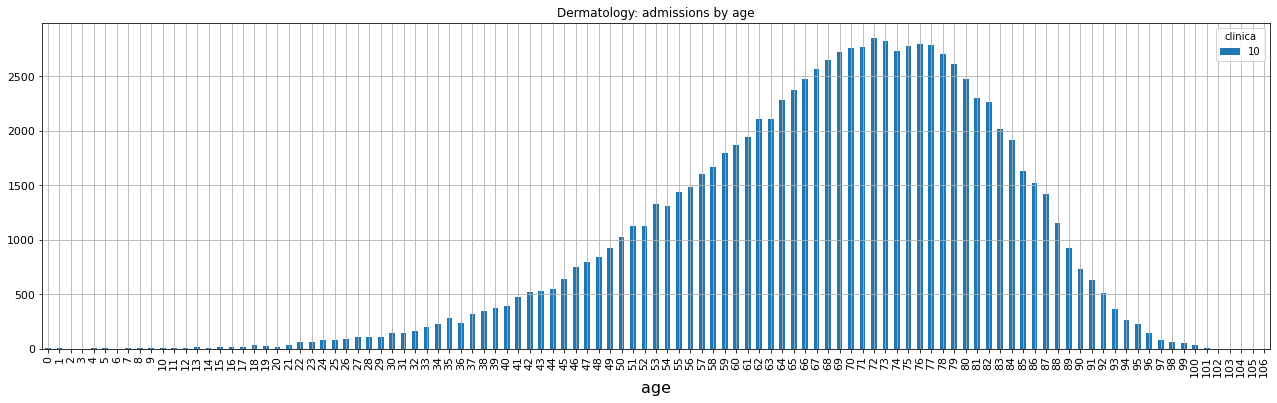

In [27]:
# admitted cases to the medical speciality 10 by age group
onco_10 = rhc.query('9 < clinica < 11')
onco_10.groupby(['idade','clinica']).size().unstack().plot(kind='bar',stacked=False, rot=90, figsize=(22,6), fontsize=11)
plt.title('Dermatology: admissions by age')
plt.xlabel('age', fontsize=16)
plt.grid()
plt.show()

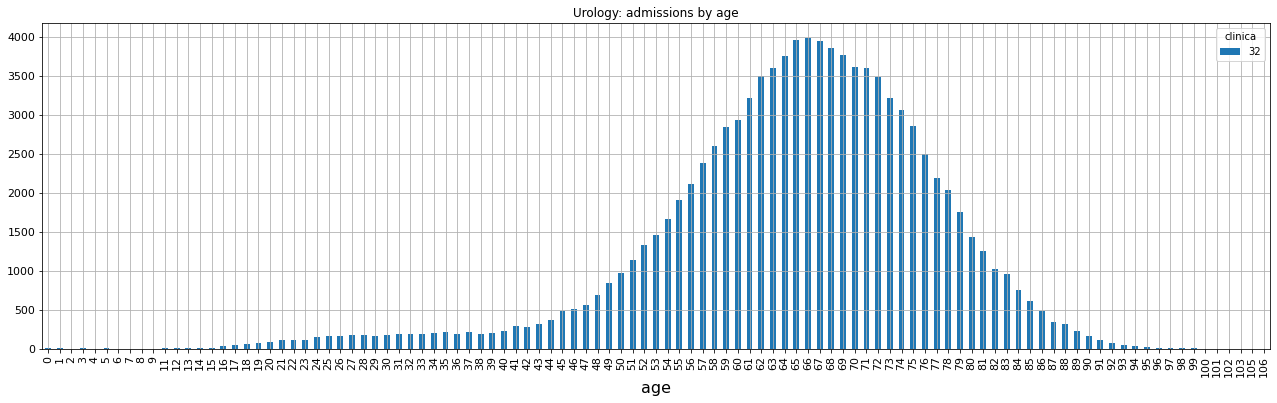

In [28]:
# admitted cases to the medical speciality 32 by age group
onco_32 = rhc.query('31 < clinica < 33')
onco_32.groupby(['idade','clinica']).size().unstack().plot(kind='bar',stacked=False, rot=90, figsize=(22,6), fontsize=11)
plt.title('Urology: admissions by age')
plt.xlabel('age', fontsize=16)
plt.grid()
plt.show()

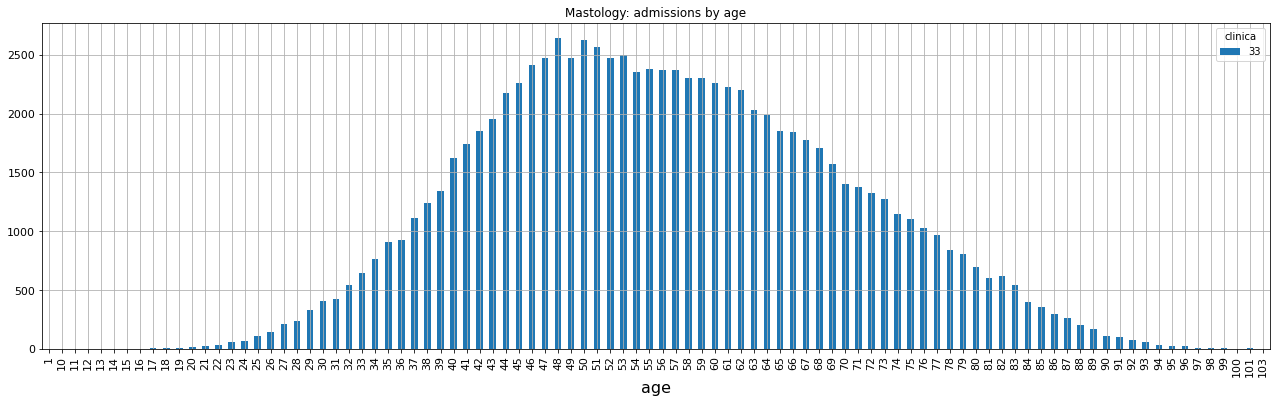

In [29]:
# admitted cases to the medical speciality 33 by age group
onco_33 = rhc.query('32 < clinica < 34')
onco_33.groupby(['idade','clinica']).size().unstack().plot(kind='bar',stacked=False, rot=90, figsize=(22,6), fontsize=11)
plt.title('Mastology: admissions by age')
plt.xlabel('age', fontsize=16)
plt.grid()
plt.show()

If necessary, we can also search in which medical specialities a certain age has checked into most often.

For example, a 1-year-old patient, on average, is admitted more often to the following medical specialities:

* 25 - pediatric oncology
* 28 - pediatrics
* 24 - clinical oncology
* 17 - hematology
* 22 - ophthalmology

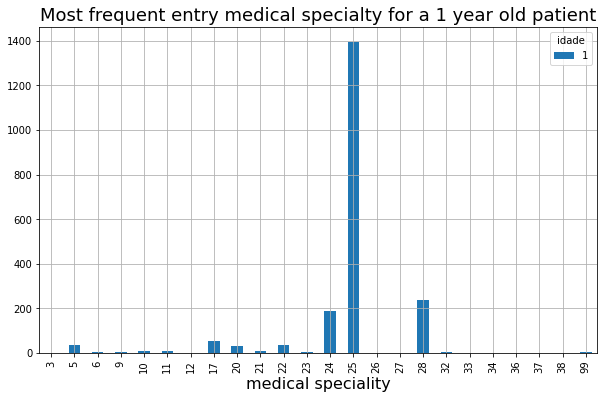

In [30]:
# admitted cases to medical specialities by the age of 1 year old
onco_0_2 = rhc.query('0 < idade < 2 ')
onco_0_2.groupby(['clinica','idade']).size().unstack().plot(kind='bar',stacked=False, rot=90, figsize=(10,6))
plt.title('Most frequent entry medical specialty for a 1 year old patient', fontsize=18)
plt.xlabel('medical speciality', fontsize=16)
plt.grid()
plt.show()

#### Previous diagnosis and treatment

The database documentation states that the `diagprev` attribute can have four values, with the following meanings:
* 1 - without diagnosis/without treatment
* 2 - with diagnosis/without treatment
* 3 - with diagnosis/with treatment
* 4 - others

However, in the dataset, this variable has only two distinct values:
* 1 - without diagnosis/without treatment
* 2 - with diagnosis/without treatment

In [31]:
# normalize count for attribute diagprev
rhc['diagprev'].value_counts(normalize=True)

1    0.618463
2    0.381537
Name: diagprev, dtype: float64

#### Diagnosis date

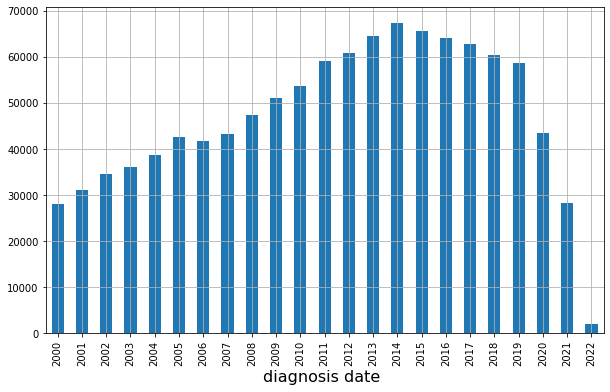

In [32]:
# diagnosis date
year_diag = rhc['year_diag'].value_counts(normalize=False).sort_index(ascending=True)
plt.xlabel('diagnosis date ', fontsize=16)
year_diag.plot.bar(figsize=(10,6))
plt.grid()
plt.show()

#### Type of diagnosis

The possible values for the `basediag` attribute are:
* 1 - clinical examination
* 2 - non-microscopic auxiliary resources
* 3 - microscopic confirmation
* 4 - no information

The database documentation states that the value `4` is used if there is no information available. However, in the dataset, we do not have 4 but `9`instead.

About 98% of diagnoses were made by microscopic confirmation.

In [33]:
# normalized count for basediag
rhc['basediag'].value_counts(normalize=True).sort_values(ascending=False)

3    0.982331
2    0.014679
1    0.002016
9    0.000975
Name: basediag, dtype: float64

#### Topography

The topography, `topo`, indicates where the tumor arose. In the dataset it is distributed among **331** different codes (according to an international classification of diseases), with approximately 24 topographies showing values above 1%. 

The top four topographies, regarding the number of cases are:
* C443 - malignant neoplasm of the skin of other parts and unspecified parts of the face
* C619 - malignant prostate cancer
* C509 - malignant neoplasm of breast, unspecified (except breast skin)
* C539 - cervical malignancy, unspecified

Topographies are also aggregated in topography groups that have in common the region where the tumor arose. They are represented by the feature `topogrup`.

In [34]:
# values above 4% for the attribute topo
rhc['topo'].value_counts(normalize=True)[rhc['topo'].value_counts(normalize=True) > 0.04]

C443    0.104146
C619    0.103806
C509    0.051669
C539    0.043983
Name: topo, dtype: float64

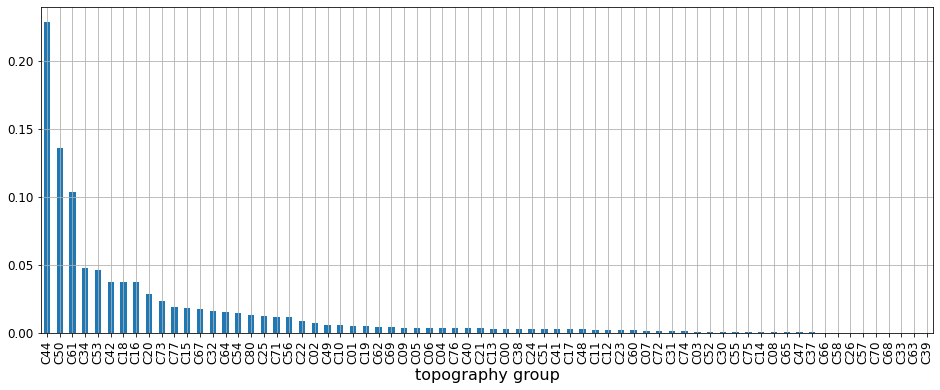

In [35]:
# topography groups
topogrup = rhc['topogrup'].value_counts(normalize=True).sort_values(ascending=False)
plt.xlabel('topography group', fontsize=16)
topogrup.plot.bar(figsize=(16,6), fontsize=12)
plt.grid()
plt.show()

In [36]:
# number of topography groups
rhc['topogrup'].nunique()

70

In [37]:
# values above 4% for the attribute topogrup
rhc['topogrup'].value_counts(normalize=True)[rhc['topogrup'].value_counts(normalize=True) > 0.04]

C44    0.227963
C50    0.135830
C61    0.103806
C34    0.047466
C53    0.046631
Name: topogrup, dtype: float64

The grouping of topographies in the feature `topogrup` reduces the number of variables (tumor codes) to **70**, as can be seen in the figure above. 

The four most frequent group types are:
* C44 - skin
* C50 - breast
* C61 - prostate
* C53 - cervix

The next two figures illustrate how we can cross-check information such as topography and the year of diagnosis in different ways:
1. different topographies observed in 2002
2. frequent occurrences of a specific topography

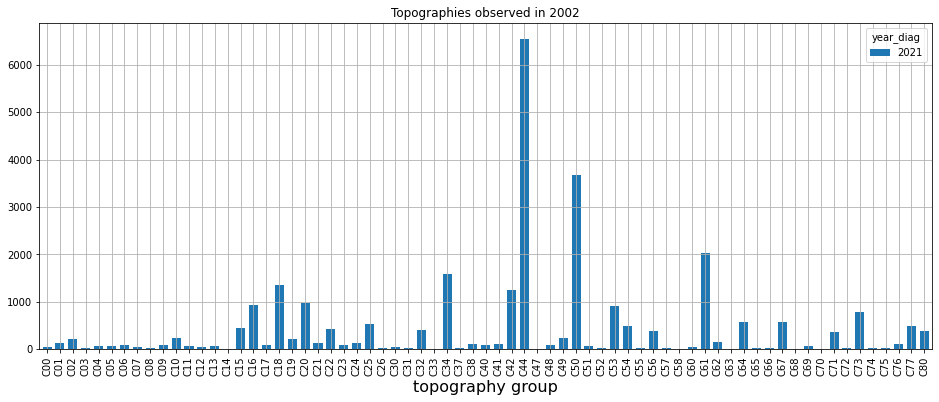

In [38]:
# list of topography groups by year of diagnosis

onco_datadiag = rhc.query('2020 < year_diag < 2022 ')
onco_datadiag.groupby(['topogrup', 'year_diag']).size().unstack().plot(kind='bar',stacked=False, rot=90, width=0.7, figsize=(16,6))
plt.title('Topographies observed in 2002')
plt.xlabel('topography group', fontsize=16)
plt.grid()
plt.show()

#### Morphology

The morphology represents the characteristics of the tumor, including its cell type and biological activity.

The morphology codes with values above 5% are:

* 80703 - Squamous cell carcinoma, SOE
* 81403 - Adenocarcinoma, SOE
* 80903 - Basal cell carcinoma, SOE
* 85003 - Papillary carcinoma, SOE
* 85503 - Acinous cell carcinoma      

**SOE** = no other specification

In [39]:
# morfology counts above 5%
rhc['morfo'].value_counts(normalize=True)[rhc['morfo'].value_counts(normalize=True)>0.05]

80703    0.158382
81403    0.136890
85003    0.097749
80903    0.095161
85503    0.068216
Name: morfo, dtype: float64

#### Clinical staging and TNM classification

To stage a tumor is to assess its degree of spread. In [this article](https://cancerstaging.org/references-tools/deskreferences/Documents/Principles%20of%20Cancer%20Staging.pdf), you can learn more about the **principles of cancer staging**.

The various names of tumors can be grouped into classes that produce an international nomenclature system.

In clinical tumor staging, cancer cases are divided into groups, according to so-called stages. The staging coding ranges from 0 to IV, being:
* 0 - Primary tumors, classified as in situ
* I - Localized tumors
* II - Tumors with regional involvement by direct extension
* III - Tumors with regional lymph node involvement
* IV - Tumors with distant metastasis

The letters A and B are related to the absence/presence of symptoms (weight loss, fever, sweating).

The letter C is the certainty factor (C-factor), and it represents the intensity of the studies and the validity of the classification:
* C1, confirmation by standard diagnostic means; 
* C2, confirmation by special diagnostic means; 
* C3, confirmation by surgical exploration (including biopsy and cytology); 
* C4, confirmation by the extent of disease following definitive surgery and pathological examination; 
* C5, confirmation by autopsy.


The basis for coding most tumors is the **Classification of malignant tumors** (TNM). Through the TNM system it is possible to describe a clinical extension of the malignant tumor, based on the evaluation of three components:
* T - Extension of the primary tumor
* N - Absence or presence and extension of metastases in regional lymph nodes
* M - Absence or presence of distant metastasis

Each component has a numerical variation:
* T = 0, 1, 2, 3, 4;
* N = 0, 1, 2, 3
* M = 0, 1

In situations where it is not possible to use the TNM classification or the tumor has not been evaluated, the codes used are:
* X - tumors cannot be covered by the professional or by ready information
* Y - tumors for which the TNM classification does not apply, for example, non-heavy tumors, such as leukemias

The combination of letters and numbers provides more accurate information on the extent of the disease for each anatomical location.

In the present data set, the clinical stage `ec` presents 30 distinct records, which when grouped in the` ecgrup`, result in 7 categories. The TNM classification is found in the columns `t`,`n` and `m`.

In [40]:
# clinical staging: number of unique values
rhc['ec'].nunique()

30

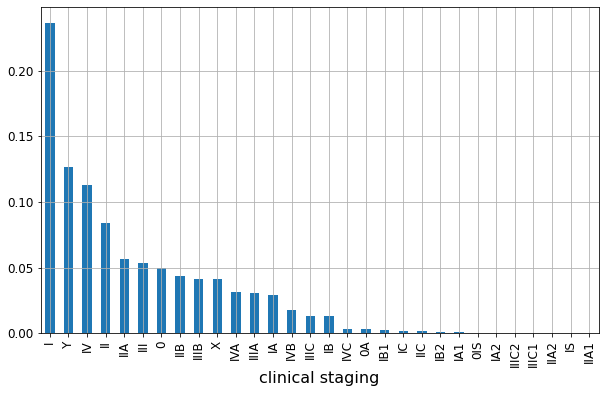

In [41]:
# clinical staging
staging = rhc['ec'].value_counts(normalize=True).sort_values(ascending=False)
plt.xlabel('clinical staging', fontsize=16)
staging.plot.bar(figsize=(10,6), fontsize=12)
plt.grid()
plt.show()

In [42]:
# clinical staging per group
rhc['ecgrup'].nunique()

7

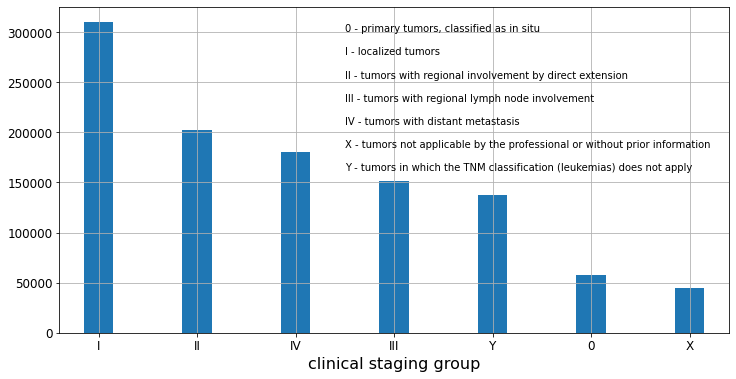

In [41]:
# clinical staging group
staging_group = rhc['ecgrup'].value_counts(normalize=False).sort_values(ascending=False)
plt.xlabel('clinical staging group', fontsize=16)
staging_group.plot.bar(figsize=(12,6), rot=0, width=0.3, fontsize=12)
plt.text(2.5, 150000,''' 
0 - primary tumors, classified as in situ \n
I - localized tumors \n
II - tumors with regional involvement by direct extension \n
III - tumors with regional lymph node involvement \n
IV - tumors with distant metastasis \n
X - tumors not applicable by the professional or without prior information \n
Y - tumors in which the TNM classification (leukemias) does not apply
''', fontsize = 10)
plt.grid()
plt.show()

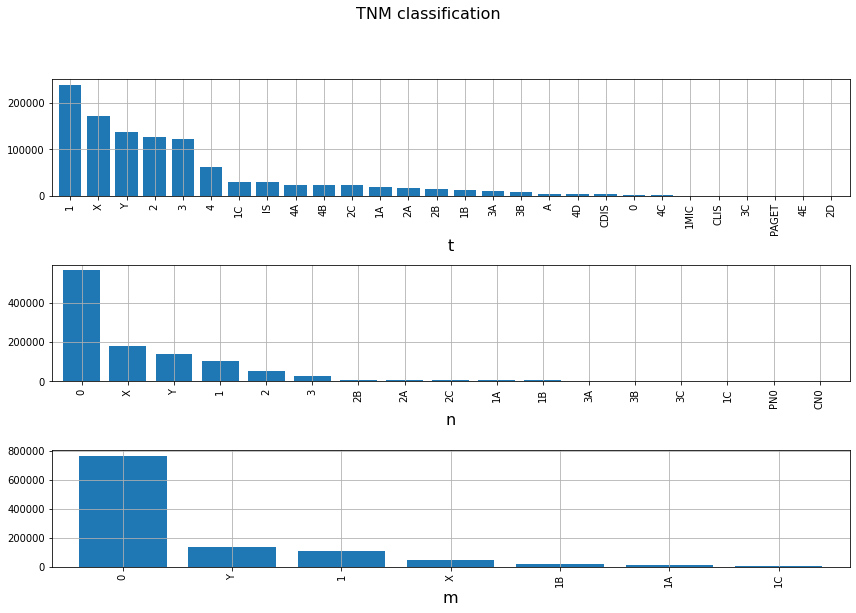

In [44]:
# TNM staging
tnm = ['t', 'n', 'm']

fig = plt.figure()
num = 0

fig.suptitle('TNM classification', fontsize=16, y=1.05)

for item in tnm:
    num += 1
    counts = rhc[item].value_counts(normalize=False)
    ax = fig.add_subplot(4,1,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=0.8,figsize=(12,10), fontsize=10)
    plt.grid()

plt.tight_layout()
#plt.savefig('treatments.jpg')
plt.show()

#### Post-surgical staging (pTNM)

This represents the histopathological classification based on additional evidence obtained through surgery and histological examination.

Considering the three types of pTNM staging, there are some characters that do not fit the existing classifications and suggest an error in filling the field:
* `pt`:` < ... `
* `pn`:` < .`
* `pm`:` < . `


Although the number of occurrences in these variables is not the same, the values are very similar. Did the character sets mentioned above have been misspelled almost 2000 times?

In [45]:
# post surgical staging
rhc['pt'].value_counts()

X        111318
1        103438
2         51182
Y         45114
3         41816
IS        18263
4         13524
1C        13073
2C        11766
1A        11389
1B         8878
2A         5963
2B         5818
4A         5570
3A         4911
4B         4657
0          3977
3B         3291
A          2154
< ...      1889
CDIS       1146
4D          567
3C          457
1A1         311
1B1         293
1MIC        273
CLIS        154
4C          132
1B2         116
1A2          53
PAGET        14
4E            2
T2            2
2b            2
T3B           2
T1C           2
T4B           1
T1A           1
T3            1
T1B           1
AD            1
IC            1
4b            1
3a            1
PIS           1
y             1
Name: pt, dtype: int64

In [46]:
# post surgical staging
rhc['pm'].value_counts()

0      251153
X      120493
Y       44727
1       17770
< .      1915
1A       1500
1B       1390
1C        127
M0          6
Name: pm, dtype: int64

In [47]:
# post surgical staging
rhc['pn'].value_counts()

0        223632
X        130749
Y         44936
1         35497
2         13327
3          3830
2A         2716
1A         2701
2B         2310
1B         2135
< ...      1903
3A         1044
2C          736
1C          294
3B          154
3C           69
N0            3
PN0           2
2c            1
N3            1
N1            1
1Bi           1
1B1           1
O             1
IBII          1
N2B           1
Name: pn, dtype: int64

#### Degree of classification, g

About 96% of the values consist of 8 (not applicable).

In [48]:
rhc['g'].value_counts(normalize=True)

8    0.958919
9    0.013312
3    0.010513
2    0.009014
1    0.004551
4    0.003689
Name: g, dtype: float64

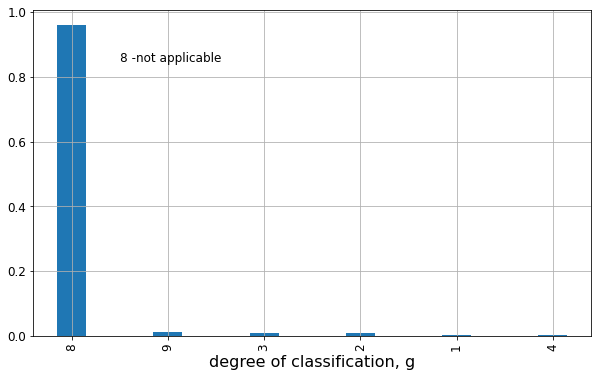

In [49]:
# classification degree
g_degree = rhc['g'].value_counts(normalize=True).sort_values(ascending=False)
plt.xlabel('degree of classification, g', fontsize=16)
g_degree.plot.bar(figsize=(10,6), width=0.3, fontsize=12)
plt.text(0.5, 0.8,''' 
8 -not applicable
''', fontsize = 12)
plt.grid()
plt.show()

#### TNM location

The values attributed to the _TNM location_ are very similar to that of the` g` classification, that is, about 99% of the values received the classification 8 (not applicable).

In [50]:
rhc['localtnm'].value_counts(normalize=True)

8    0.994057
2    0.002678
9    0.001585
1    0.000860
3    0.000820
Name: localtnm, dtype: float64

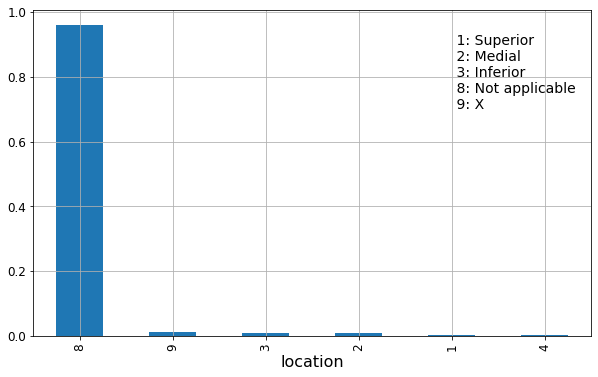

In [51]:
# location
location = rhc['localtnm'].value_counts(normalize=True).sort_values(ascending=False)
plt.xlabel('location', fontsize=16)
g_degree.plot.bar(figsize=(10,6), fontsize=12)
plt.text(4.0, 0.7,' 1: Superior\n 2: Medial\n 3: Inferior\n 8: Not applicable\n 9: X', fontsize = 14)
plt.grid()
plt.show()

#### Mitotic index

The mitotic index gives the capacity of cells to divide and the rate of cell division. It is useful to identify the sites of growth within a tissue and to determine which cell types are dividing.

The mitotic index values in the data set are:
* 1 - high
* 2 - low
* 8 - not applicable
* 9 - X

Not applicable = 99.95%

In [52]:
rhc['idmitotic'].value_counts(normalize=True)

8    0.999232
2    0.000458
1    0.000212
9    0.000099
Name: idmitotic, dtype: float64

#### PSA (prostate specific antigen)

Variable associated with prostate cancer. The PSA test determines the level of an enzyme, produced by the prostate, in the blood.

* 1 - less than 10
* 2 - greater than or equal to 10 and less than 20
* 3 - greater than or equal to 20
* 8 - not applicable
* 9 - X

In this case, it is expected that 97% (see below) of the cases are not prostate cancer, once they are rated as "not applicable".

For the existing cases, most have a concentration below 10.

In [53]:
rhc['psa'].value_counts(normalize=True)

8    0.958777
1    0.022561
2    0.007867
3    0.007100
9    0.003695
Name: psa, dtype: float64

#### Gleason

Variable also associated with prostate cancer. A [Gleason](https://www.prostateconditions.org/about-prostate-conditions/prostate-cancer/newly-diagnosed/gleason-score) scale is a score given in prostate cancer based on its microscopic appearance (biopsy).
* 1 - less than or equal to 6
* 2 - equal to 7
* 3 - greater than or equal to 8
* 8 - not applicable
* 9 - X

As in the PSA, 97% of cases are expected to be non-prostate cancer.

Most of the confirmed cases are rated as 7 and 6 or less.

In [54]:
rhc['gleason'].value_counts(normalize=True)

8    0.958777
2    0.018207
1    0.011715
3    0.008381
9    0.002920
Name: gleason, dtype: float64

#### Other classifications: `outracla`

In the column `outracla`("other classifications"), specific international classifications, other than TNM, are included, for example,
* FIGO (gynecological tumors)
* Ann Arbor (Hodgking's lymphoma)
* RAI (leukemia)
* CIN (cervical neoplasia)
* ISS (multiple myeloma)
* Clark (skin cancer)
* and others.

Looking more closely, the unique values are widely distributed, i.e., none of which have a high count. However, when analyzing the column, it is observed that the number of individual entries may be much smaller than the one found. This happens because there was no uniformity in filling in the field since the same entry was written in many different ways.

For example: 
* `GRAU 2` (where grau means degree) was written as `GRAU II`, `G II`, `G2`, `G 2`, `GRAU  II`, `GRAUII`, `GRAU2`, `GRAU   2`, and more. 
* Classifications with foreign names like Bormmann may appear as `BORMANN`, `BORMAN`, `BORRMANN`, `BORMAM`, `BORMAN`, and more. 
* Considering also the variation in the number of spaces between characters, it is noted how the number of single items can increase significantly due to operator errors, due to the free-fill-in field.

Having in mind the above issues, the most frequent value is `GRAU II`. Applying filters to eliminate different graphs, the count of this classification is more than doubled.

In [55]:
# number of unique values in the feature outracla
rhc['outracla'].describe()

count       66054
unique       6927
top       GRAU II
freq         6011
Name: outracla, dtype: object

In [56]:
# top five counts for outcla var
rhc['outracla'].value_counts().head(9)

GRAU II      6011
GRAU 2       5398
GRAU 3       4174
GRAU III     4159
GRAU 1       3308
GRAU I       2961
GLEASON 6    1811
GLEASON 7    1733
G II         1152
Name: outracla, dtype: int64

We can cross the data of the features `outracla` with` topo` and compare the classifications attributed to the topologies. 

Since the `outracla` column contains a lot of null data, we can use the `.notnull ()` method to filter the desired results.

In [57]:
# select columns outracla & topo in a new dataframe
onco_selection = rhc.loc[:,['outracla','topo']][rhc['outracla'].notnull()]
onco_selection

,outracla,topo
37,IV,C778
123,IV,C162
444,II A,C189
1038,PT2 PNX PMX,C509
1302,SEM ESTADIAMENTO,C619
...,...,...
1079971,IV B,C402
1080289,S2,C621
1081260,G4,C402
1082579,S2,C629


The new dataframe can be used to filter the data using any keyword (_substring_). In the example below, a chosen _substring_ is `GRAU`.

In [58]:
# creates a new dataframe with outracla and topo with instances containing the substring GRAU
outracla_grau_only = onco_selection.loc[:,['outracla','topo']][onco_selection['outracla'].str.contains('GRAU')]
outracla_grau_only

,outracla,topo
2547,BAIXO GRAU,C679
14518,IV ALTO GRAU,C701
18251,GRAU II NUCLEAR,C503
18421,GRAU HISTOP 2,C509
18430,T2N0MX GRAU HIST 3,C679
...,...,...
1057142,GRAU I,C509
1057963,GRAU II DE ASH,C679
1057993,GRAU III,C762
1058806,GRAU III,C716


It is also possible to determine the frequency of the values that present the substring `GRAU` present in` outracla`.

In [59]:
# counts of classification GRAU in outracla
outracla_grau_only['outracla'].value_counts()

GRAU II                6011
GRAU 2                 5398
GRAU 3                 4174
GRAU III               4159
GRAU 1                 3308
                       ... 
T3B N0 M0 GRAU 7          1
GLEASON 7   GRAU II       1
GRAU 7   3C               1
GRAU I    TX N1 M0        1
GRAU 34 DE GLEASON        1
Name: outracla, Length: 443, dtype: int64

As noted earlier, it is observed that the number of unique entries may be much lower since the same entry was entered in different ways. 

In addition, some substrings that could be used to filter the data are mixed with other classifications, adding another difficulty in separating the variables.

The same procedure applied above can be repeated with another substrings. Below is an example using  the `GLEASON` substing.

In [60]:
# creates a new dataframe with outracla and topo with instances containing the substring GLEASON
outracla_gleason_only = onco_selection.loc[:,['outracla','topo']][onco_selection['outracla'].str.contains('GLEASON')]
outracla_gleason_only

,outracla,topo
14597,GLEASON 23,C619
14607,GLEASON 33,C619
14636,GLEASON 6,C619
14718,GLEASON 6,C619
14725,GLEASON 44,C619
...,...,...
1057819,GLEASON 7,C619
1057846,GLEASON 7,C619
1061997,GLEASON 7 34,C619
1063930,GLEASON 7 34,C619


In the Gleason score, two grades are assigned for each patient regarding the tumor areas. The first number represent the cells that make up the largest area of the tumor, the second one represent the cells of the next largest area. This can lead to the following combinations:
* Gleason 3+3=6 
* Gleason 3+4=7 
* Gleason 4+3=7 
* Gleason 4+4=8 
* Gleason 3+5=8 
* Gleason 5+3=8
* Gleason 4+5=9 
* Gleason 5+4=9 
* Gleason 5+5=10 

In addition, to each combination can also be attributed a grade, for example:
* Grade 1 (Gleason 6)
* Grade 2 (Gleason 3+4=7)
* Grade 3 (Gleason 4+3=7)
* Grade 4 (Gleason 8)
* Grade 5 (Gleason 9-10)

In the dataset this can appear in very different ways.

In [61]:
# counts of classification GLEASON in outracla
outracla_gleason_only['outracla'].value_counts()

GLEASON 6             1811
GLEASON 7             1733
GLEASON 9              294
GLEASON 6 33           280
GLEASON 8              279
                      ... 
GLEASON 7  PSA 3         1
GLEASON 6  PSA 043       1
GLEASON 7  PSA 47        1
GLEASON 7  PSA 309       1
9 GLEASON                1
Name: outracla, Length: 420, dtype: int64

354 cases were found with the substring `GLEASON`

In [62]:
# unique values for GLEASON in outracla with counts greater than 10
outracla_gleason_only['outracla'].value_counts()[outracla_gleason_only['outracla'].value_counts() > 10].nunique()

35

By filtering data that contains 10 or more entries for the `GLEASON` substring, the number of occurrences has decreased from 345 to 33! Again, note (see the figure below) that there is no uniformity when filling the 'outracla' field.

This irregular filling pattern is repeated throughout the column. Other examples are presented below, such as the substrings FIGO and BORMAN, remembering that this graph may have other variations not detected by this search pattern.

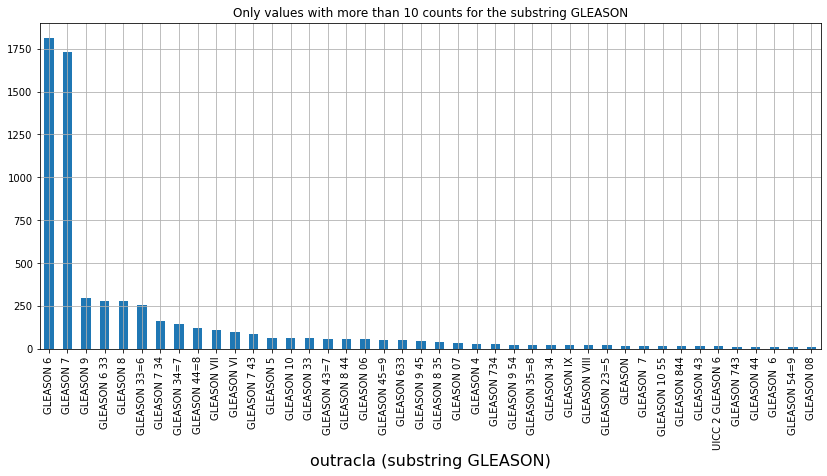

In [63]:
# plot of GLEASON with counts greater than 10
gleason = outracla_gleason_only['outracla'].value_counts()[outracla_gleason_only['outracla'].value_counts() > 10]
plt.xlabel("outracla (substring GLEASON)", fontsize=16)
gleason.plot.bar(figsize=(14,6))
plt.title('Only values with more than 10 counts for the substring GLEASON')
plt.grid()
plt.show()

In [64]:
# creates a new dataframe with outracla and topo with instances containing the substring FIGO
outracla_figo_only = onco_selection.loc[:,['outracla','topo']][onco_selection['outracla'].str.contains('FIGO')]
outracla_figo_only

,outracla,topo
18899,T3 N1 MX FIGO IIIC,C539
21475,PT1A1PNXPMX FIGO1A1,C559
21656,UICC 2 GH 2 FIGO 2B,C548
22880,UICC 2 GH2 FIGO 2,C539
24412,T1BN0M0 FIGO IB,C539
...,...,...
1020002,FIGO II,C539
1030027,E C IB FIGO,C569
1050344,FIGO II A 1,C539
1058217,FIGO IIIC,C569


In [65]:
# counts of classification FIGO in outracla
outracla_figo_only['outracla'].value_counts()

EC FIGO 0       75
FIGO IB         65
EC FIGO IB      59
FIGO 0          57
EC FIGO IIIC    51
                ..
IA  FIGO         1
EC IS  FIGO      1
FIGO EC IB1      1
EC FIGO  IV      1
FIGO II A 1      1
Name: outracla, Length: 314, dtype: int64

In [66]:
# creates a new dataframe with outracla and topo with instances containing the substring BORMAN
outracla_bormann_only = onco_selection.loc[:,['outracla','topo']][onco_selection['outracla'].str.contains('BORMAN')]

In [67]:
# counts of classification BORMAN in outracla
outracla_bormann_only['outracla'].value_counts()

BORMAN III              30
BORMANN III             22
BORMAN IV               20
BORMAN II               12
BORMANN IV               5
BORMANN II               3
BORMANN 3                2
BORMANN 2                2
BORMAN                   2
BORMAN I                 2
BORMAN  III              1
BORMANN TIPO III         1
BORMANN III  II C        1
GRAU II BORMANN IV       1
BORMANN I                1
TIPO II FR BORMAN        1
BORMANN                  1
GRAU III  BORMANN IV     1
BORMANN IV INFILTRAT     1
Name: outracla, dtype: int64

In [68]:
# search for specific terms in outracla column
rhc[rhc['outracla'].astype(str).str.contains("GLOMERU")]

,escolari,idade,sexo,ufnasc,ufresid,ibge,cidade,cateatend,dtconsult,clinica,diagprev,dtdiag,basediag,topo,topogrup,desctopo,morfo,descmorfo,ec,ecgrup,t,n,m,pt,pn,pm,s,g,localtnm,idmitotic,psa,gleason,outracla,meta01,meta02,meta03,meta04,dttrat,naotrat,tratamento,trathosp,tratfantes,tratfapos,nenhum,cirurgia,radio,quimio,hormonio,tmo,imuno,outros,nenhumant,cirurant,radioant,quimioant,hormoant,tmoant,imunoant,outroant,nenhumapos,cirurapos,radioapos,quimioapos,hormoapos,tmoapos,imunoapos,outroapos,dtultinfo,ultinfo,consdiag,tratcons,diagtrat,anodiag,cici,cicigrup,cicisubgru,faixaetar,laterali,instorig,drs,rras,perdaseg,erro,dtrecidiva,recnenhum,reclocal,recregio,recdist,rec01,rec02,rec03,rec04,ibgeaten,cido,dsccido,habilit,habilit1,habilit2,cidadeh,year_consult,year_diag,year_ultinfo,year_recidiva,year_trat,month_consult
24943,4,28,2,SP,SP,3541000,PRAIA GRANDE,2,2015-12-30,9,1,2016-03-03,2,C421,C42,MEDULA OSSEA,97603,DOENCA IMUNOPROLIFERATIVA SOE,Y,Y,Y,Y,Y,NaN,NaN,NaN,8,8,8,8,8,8,GLOMERULONEFRITE LUP,NaN,NaN,NaN,NaN,2016-03-04,8,C,C,J,J,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2021-08-10,2,64.0,65.0,1.0,2016,NaN,NaN,NaN,20-29,8,NaN,DRS 04 SANTOS,7,0,0,NaT,1,0,0,0,NaN,NaN,NaN,NaN,3548500,97603,DOENCA IMUNOPROLIFERATIVA SOE,2,1,1,Santos,2015,2016,2021,NaN,2016.0,12


In [69]:
# locating an specific entry
grouped = rhc.groupby('outracla')
grouped.get_group("CLARK V BRESLOW 7 MM")

,escolari,idade,sexo,ufnasc,ufresid,ibge,cidade,cateatend,dtconsult,clinica,diagprev,dtdiag,basediag,topo,topogrup,desctopo,morfo,descmorfo,ec,ecgrup,t,n,m,pt,pn,pm,s,g,localtnm,idmitotic,psa,gleason,outracla,meta01,meta02,meta03,meta04,dttrat,naotrat,tratamento,trathosp,tratfantes,tratfapos,nenhum,cirurgia,radio,quimio,hormonio,tmo,imuno,outros,nenhumant,cirurant,radioant,quimioant,hormoant,tmoant,imunoant,outroant,nenhumapos,cirurapos,radioapos,quimioapos,hormoapos,tmoapos,imunoapos,outroapos,dtultinfo,ultinfo,consdiag,tratcons,diagtrat,anodiag,cici,cicigrup,cicisubgru,faixaetar,laterali,instorig,drs,rras,perdaseg,erro,dtrecidiva,recnenhum,reclocal,recregio,recdist,rec01,rec02,rec03,rec04,ibgeaten,cido,dsccido,habilit,habilit1,habilit2,cidadeh,year_consult,year_diag,year_ultinfo,year_recidiva,year_trat,month_consult
356685,1,90,2,SP,SP,3555000,TUPA,9,2009-12-04,23,1,2009-12-18,3,C447,C44,PELE DO QUADRIL E MEMBROS INFERIORES,87443,MELANOMA LENTIGINOSO MALIGNO DAS EXTREMIDADES,IIIB,III,4B,1A,0,4B,1A,0,8,8,8,8,8,8,CLARK V BRESLOW 7 MM,NaN,NaN,NaN,NaN,2009-12-18,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2010-08-15,3,14.0,14.0,0.0,2009,NaN,NaN,NaN,70+,2,NaN,DRS 09 MARÖLIA,10,0,0,NaT,1,0,0,0,NaN,NaN,NaN,NaN,3525300,87443,MELANOMA LENTIGINOSO MALIGNO DAS EXTREMIDADES,7,3,2,Jau,2009,2009,2010,NaN,2009.0,12


In [70]:
# unique values of column outracla, entries with counts between 125 and 7000.
# (rhc['outracla']
#    .value_counts(normalize=False)[((rhc['outracla']
#    .value_counts(normalize=False) >= 125) & (rhc['outracla']
#    .value_counts(normalize=False) <= 7000))]
#    )

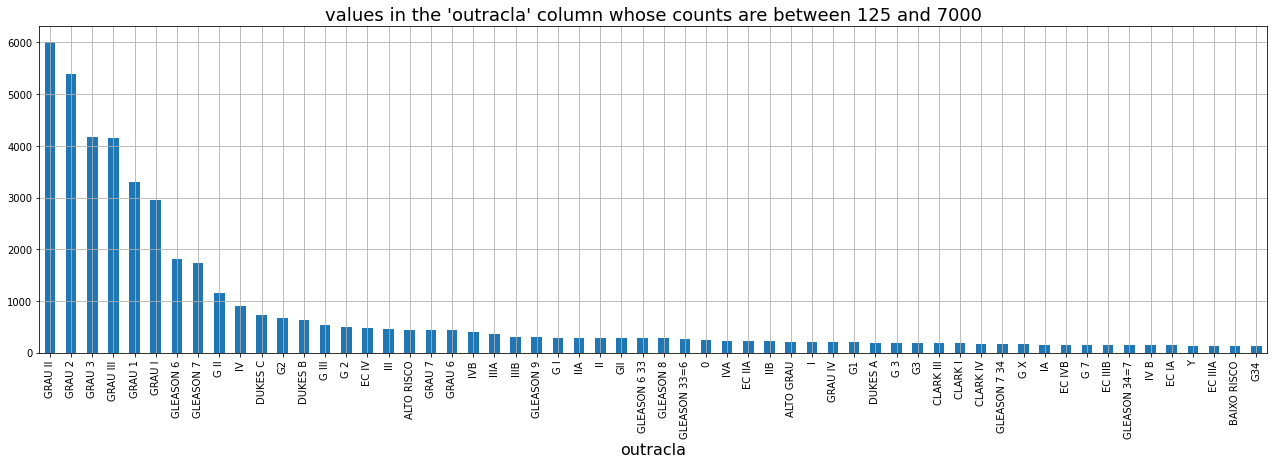

In [71]:
# plot of column outracla entries with counts between 125 and 7000.
(rhc['outracla']
    .value_counts(normalize=False)[((rhc['outracla']
    .value_counts(normalize=False) >= 125) & (rhc['outracla']
    .value_counts(normalize=False) <= 7000))]
    .plot.bar(figsize=(22,6))
    )
plt.xlabel("outracla", fontsize=16)
plt.title("values in the 'outracla' column whose counts are between 125 and 7000", fontsize=18)
plt.grid()
plt.show()

In [72]:
# unique values  of column outracla entries with counts between 41 and 124.
# (rhc['outracla']
#   .value_counts(normalize=False)[((rhc['outracla']
#    .value_counts(normalize=False) >= 41) & (rhc['outracla']
#    .value_counts(normalize=False) <= 124))]
#    )

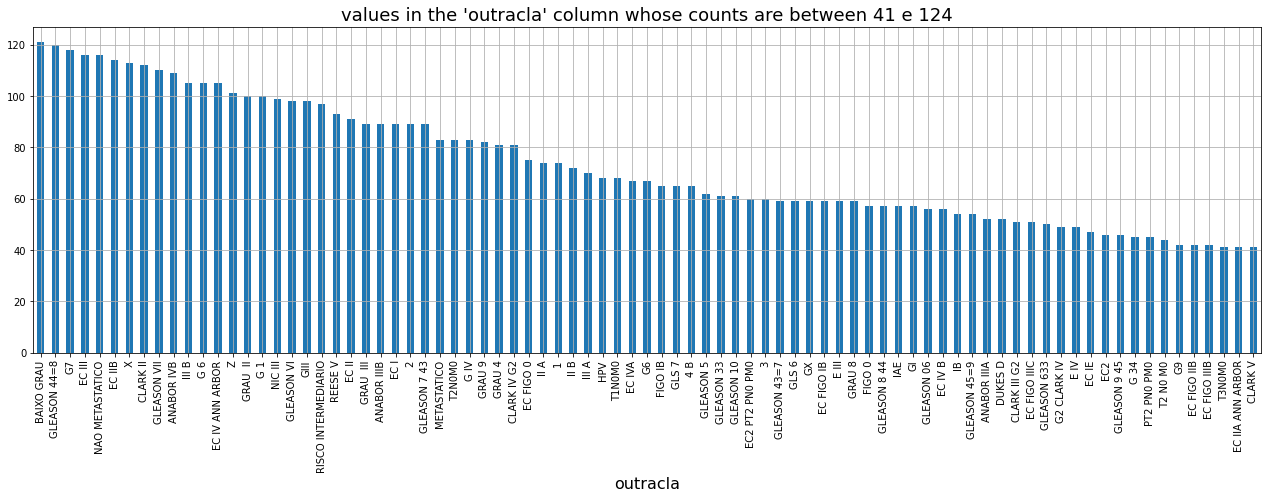

In [73]:
# plot of column outracla entries with counts between 41 and 124.
(rhc['outracla']
    .value_counts(normalize=False)[((rhc['outracla']
    .value_counts(normalize=False) >= 41) & (rhc['outracla']
    .value_counts(normalize=False) <= 124))]
    .plot.bar(figsize=(22,6))
    )
plt.xlabel("outracla", fontsize=16)
plt.title("values in the 'outracla' column whose counts are between 41 e 124", fontsize=18)
plt.grid()
plt.show()

In [74]:
# unique values  of column outracla entries with counts between 20 and 40.
# (rhc['outracla']
#    .value_counts(normalize=False)[((rhc['outracla']
#    .value_counts(normalize=False) >= 20) & (rhc['outracla']
#    .value_counts(normalize=False) <= 40))]
#    )

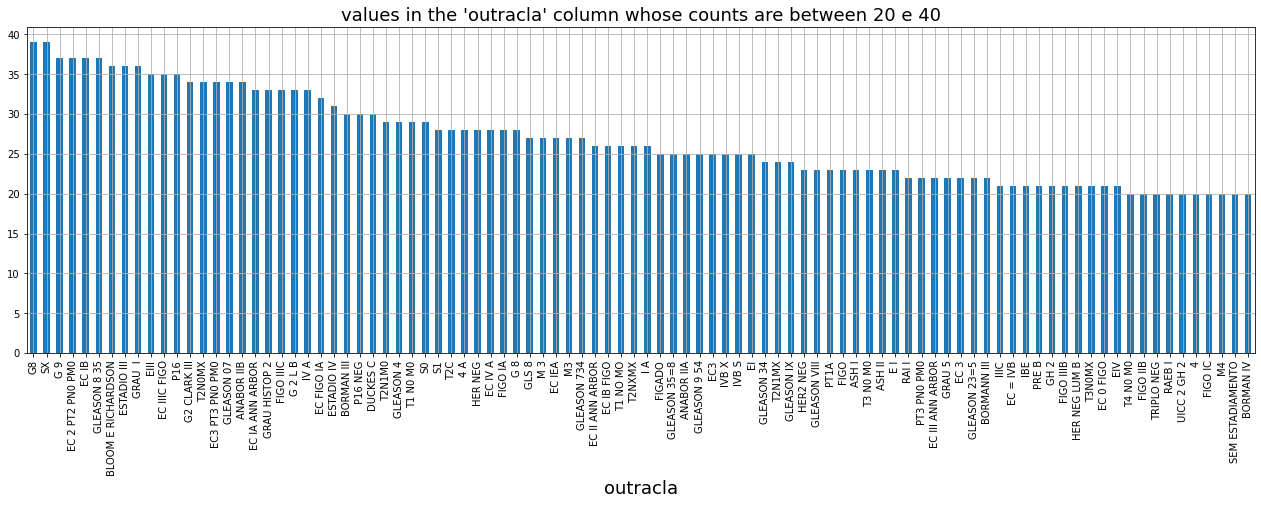

In [75]:
# plot of column outracla entries with counts between 20 and 40.
(rhc['outracla']
    .value_counts(normalize=False)[((rhc['outracla']
    .value_counts(normalize=False) >= 20) & (rhc['outracla']
    .value_counts(normalize=False) <= 40))]
    .plot.bar(figsize=(22,6))
    )
plt.xlabel("outracla", fontsize=18)
plt.title("values in the 'outracla' column whose counts are between 20 e 40", fontsize=18)
plt.grid()
plt.show()

In [76]:
# unique values of column outracla entries with counts between 12 and 19.
# (rhc['outracla']
#    .value_counts(normalize=False)[((rhc['outracla']
#    .value_counts(normalize=False) >= 12) & (rhc['outracla']
#    .value_counts(normalize=False) <= 19))]
#    )

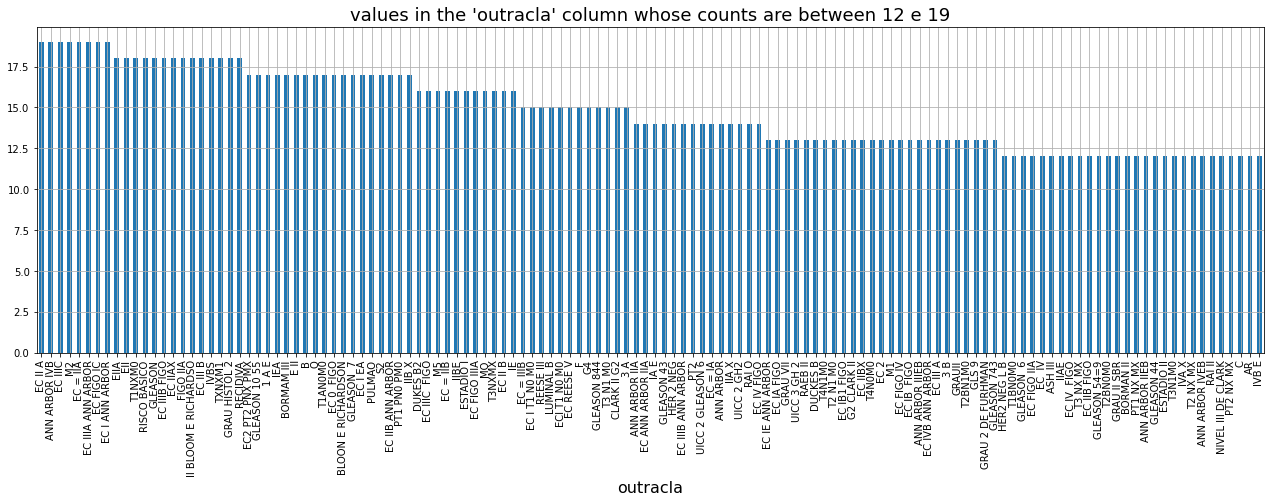

In [77]:
# plot  of column outracla entries with counts between 12 and 19.
(rhc['outracla']
    .value_counts(normalize=False)[((rhc['outracla']
    .value_counts(normalize=False) >= 12) & (rhc['outracla']
    .value_counts(normalize=False) <= 19))]
    .plot.bar(figsize=(22,6))
    )
plt.xlabel("outracla", fontsize=16)
plt.title("values in the 'outracla' column whose counts are between 12 e 19", fontsize=18)
plt.grid()
plt.show()

In [78]:
# unique values of column outracla entries with counts between 2 and 11.
(rhc['outracla']
    .value_counts(normalize=False)[((rhc['outracla']
    .value_counts(normalize=False) >= 2) & (rhc['outracla']
    .value_counts(normalize=False) <= 11))]
)

PT1B NX MX         11
EC FIGO IVA        11
T3N2M0             11
RAI III            11
G 2 L A            11
                   ..
G 3A                2
PT 3B               2
T1 N1 MX            2
PT1C PN0 PM0        2
CLARK IV B 54MM     2
Name: outracla, Length: 1526, dtype: int64

In [79]:
# # unique values of column outracla entries with counts equal to 1.
(rhc['outracla']
    .value_counts(normalize=False)[(rhc['outracla']
    .value_counts(normalize=False) == 1)]
)

PTX PN1                 1
CLARK III B 4 MM        1
GRAU HISTOP 2 T2N1      1
EC 4 PT2 PNX PM1        1
ATMIT 210               1
                       ..
CLARKIVBRESLOW147       1
CLARK IVBRESLOW 10MM    1
T4N0M0 GH2              1
CLARK III BRESL 115     1
DUKESA                  1
Name: outracla, Length: 5036, dtype: int64

##### Remarks on `outracla`

The `outracla` columns contains unique information about specific types of cancer, so it seems important to retrieve this data.

We have found fot the `outracla` column, with a total of 6048 non-zero values, has the following characteristics:
* `55` entries with unique values (counts) between 125 and 7000
* `80` entries with unique values between 41 and 124
* `79` entries with unique values between 20 and 40
* `116` entries with unique values between 12 and 19
* `1386` entries with unique values between 2 and 11
* `4332` entries with 1 unique value

Although there is a range of tumor classifications, they do not add up to 6048.

A **possible solution** to reduce this number would be to create filters using regular expressions, for example, to identify the different substrings of interest, to later standardize the nomeclature by correcting input errors. However the lack of a pattern when filling the field can lead to loss of information. A better approach could be to separate the dataset by topography groups and then try to filter the values with the help of this knowledge.

Considering that this field stores unique and important information may be it would be helpful to design a new approach when collecting the data. Taking into account that the errors are made by the user when filling in the form, this problem could be solved by implementing, for example a drop-down menu instead of a free-fill field form or even creating new columns for specific cancer classifications.

#### Indication of metastases

Metastasis is the spread of cancer cells to new regions of the body.

In the dataset, there are four classifications filled with CID-O coding (an international classification system), they are represented by the columns:
* `meta01`
* `meta02`
* `meta03`
* `meta04`

In [80]:
# meta01
# rhc['meta01'].value_counts()

In [81]:
# meta02
# rhc['meta02'].value_counts()

In [82]:
# meta03
# rhc['meta03'].value_counts()

In [83]:
# meta04
# rhc['meta04'].value_counts()

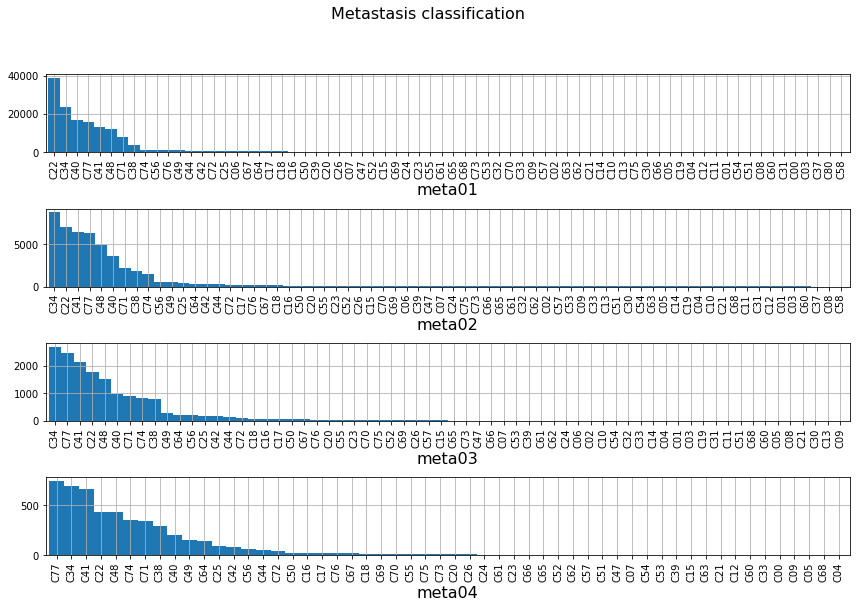

In [84]:
# metastasis classification
metas = ['meta01', 'meta02', 'meta03', 'meta04']

fig = plt.figure()
num = 0

fig.suptitle('Metastasis classification', fontsize=16, y=1.05)

for item in metas:
    num += 1
    counts = rhc[item].value_counts(normalize=False)
    ax = fig.add_subplot(4,1,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=1,figsize=(12,8), fontsize=10)
    plt.grid()

plt.tight_layout()
#plt.savefig('treatments.jpg')
plt.show()

#### Treatment starting date 

In [85]:
rhc.year_trat.describe()

count    997288.000000
mean       2011.631081
std           5.815501
min        2000.000000
25%        2007.000000
50%        2012.000000
75%        2016.000000
max        2022.000000
Name: year_trat, dtype: float64

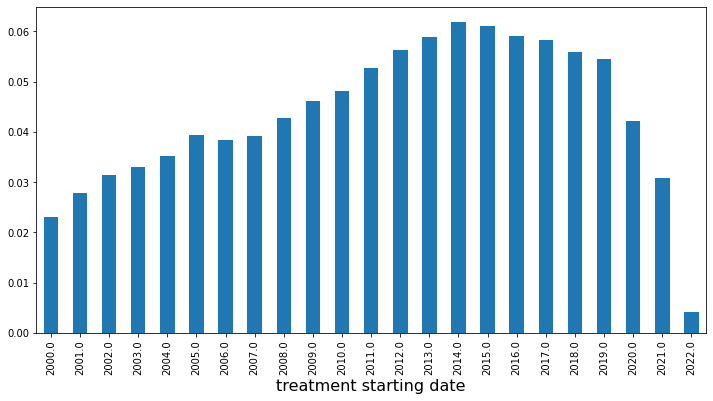

In [86]:
# plot of the treatment start date
year_trat =rhc['year_trat'].value_counts(normalize=True).sort_index(ascending=True)
plt.xlabel('treatment starting date', fontsize=16)
year_trat.plot.bar(figsize=(12,6))
plt.show()

#### Reason for not doing the treatment, `naotrat`

Most of the data correspond to cases with treatment, being followed by:

* 8 - doesn't apply (if treatment is included)
* 5 - death from cancer
* 7 - others
* 2 - advanced disease, lack of clinical conditions 

The data can be better viewed in the figure below, which has been omitted item 8.

In [87]:
# reason for not treating
# rhc.naotrat.value_counts(normalize=True)

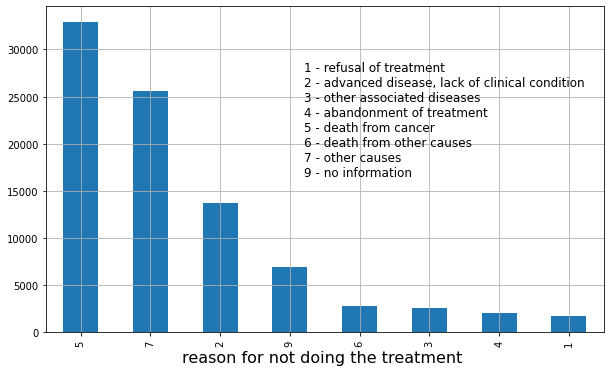

In [88]:
# plot of reason for not treating
nao_trat = rhc['naotrat'].value_counts(normalize=False)[rhc['naotrat'].value_counts(normalize=True) < 0.9]
plt.xlabel('reason for not doing the treatment ', fontsize=16)
nao_trat.plot.bar(figsize=(10,6))
plt.text(3.2, 15000, '''
1 - refusal of treatment
2 - advanced disease, lack of clinical condition
3 - other associated diseases
4 - abandonment of treatment
5 - death from cancer
6 - death from other causes
7 - other causes
9 - no information
''', fontsize=12)
plt.grid()
plt.show()

#### Treatments applied

The treatments are grouped by types, which are used individually or in combination:

* A: Surgery
* B: Radiotherapy 
* C: Chemotherapy
* D: Surgery + Radiotherapy
* E: Surgery + Chemotherapy
* F: Radiotherapy + Chemotherapy
* G: Surgery + Radiotherapy + Chemotherapy
* H: Surgery + Radiotherapy + Chemotherapy + Hormone
* I: Other treatment combinations
* J: No treatment has done

Treatments are also grouped by periods (before, during and after):

* `tratamento`: treatments done
* `trathosp`: treatments done at the hospital
* `tratfantes`: treatments done before / during admission outside the hospital
* `tratfaopos`: treatments done after admission outside the hospital

The information provided by the RHC does not make it clear what is the difference between the data present in the `treatment` and` trathosp` columns. A visual analysis (see figure below) of the data indicates very similar trends. However, when comparing the numbers (see below), the differences are evident.

The data indicate that most patients underwent some surgical procedure. The next figure illustrates which treatments were most used.

In [89]:
# summary of the column 'tratamento'
rhc.tratamento.describe()

count     1085380
unique         10
top             A
freq       399788
Name: tratamento, dtype: object

In [90]:
# summary of the column 'trathosp'
rhc.trathosp.describe()

count     1085380
unique         10
top             A
freq       407323
Name: trathosp, dtype: object

In [91]:
# comparing counts for the columns 'tratamento' and 'trathosp'
trat = rhc.tratamento.value_counts().sort_index()
trath = rhc.trathosp.value_counts().sort_index()
blank ='   '
tratamento = 'treatment'
trathosp = 'treatment at the hospital'
dif = '|difference|'
print('-'*55)
#print(f'tratamento{blank}trathosp')
print(f'{tratamento:>10}{trathosp:>30}{dif:>15}')
print('-'*55)
for item in range(len(trat)):
    print(f'{trat.index[item]}{trat[item]:>10}{trath.index[item]:>15}{trath[item]:>10}{(abs(trat[item] - trath[item])):> 15}')
print('-'*55)

-------------------------------------------------------
 treatment     treatment at the hospital   |difference|
-------------------------------------------------------
A    399788              A    407323           7535
B     51307              B     49622           1685
C    107293              C    115548           8255
D     41043              D     37313           3730
E     68212              E     70596           2384
F     70756              F     64733           6023
G     54028              G     48006           6022
H     31368              H     26758           4610
I    173712              I    172120           1592
J     87873              J     93361           5488
-------------------------------------------------------


In [92]:
# summary of the column 'tratfantes'
rhc.tratfantes.describe()

count     1085380
unique          3
top             J
freq      1085378
Name: tratfantes, dtype: object

In [93]:
# summary of the column 'tratfapos'
rhc.tratfapos.describe()

count     1085380
unique         10
top             J
freq      1032056
Name: tratfapos, dtype: object

In [94]:
# summary of the column 'tratfantes'
rhc['tratfantes'].value_counts(normalize=False)

J    1085378
A          1
B          1
Name: tratfantes, dtype: int64

In [95]:
# summary of the column 'tratfapos'
rhc['tratfapos'].value_counts(normalize=False)

J    1032056
B      29323
I      11083
C       6059
A       3740
F       1922
D        475
E        449
G        211
H         62
Name: tratfapos, dtype: int64

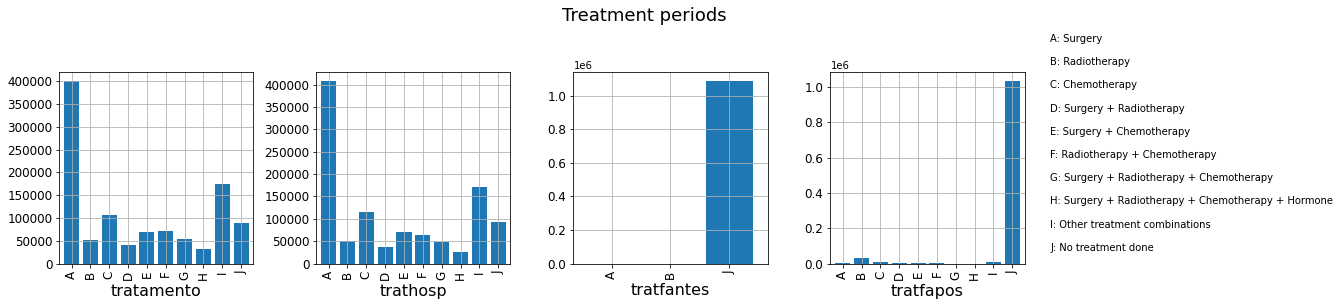

In [96]:
# treatment period
treats = ['tratamento', 'trathosp', 'tratfantes', 'tratfapos']

fig = plt.figure()
num = 0

fig.suptitle('Treatment periods', fontsize=18, y=1.05)

for item in treats:
    num += 1
    counts = rhc[item].value_counts(normalize=False).sort_index()
    ax = fig.add_subplot(1,5,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=0.8,figsize=(18,4), fontsize=12)
    plt.grid()

plt.tight_layout()
plt.text(11,7000,'''
A: Surgery\n
B: Radiotherapy\n 
C: Chemotherapy\n
D: Surgery + Radiotherapy\n
E: Surgery + Chemotherapy\n
F: Radiotherapy + Chemotherapy\n
G: Surgery + Radiotherapy + Chemotherapy\n
H: Surgery + Radiotherapy + Chemotherapy + Hormone\n
I: Other treatment combinations\n
J: No treatment done
''')
#plt.savefig('treatments.jpg')
plt.show()

The column J indicates whether or not the patient was treated at the hospital. Most of the patients were treated at the hospital.

This data is in agreement with that previously presented for the column `naotrat` which indicates the reason for not treating, when applicable.

In [97]:
# reason for not treating
rhc['nenhum'].value_counts(normalize=True)

0    0.914018
1    0.085982
Name: nenhum, dtype: float64

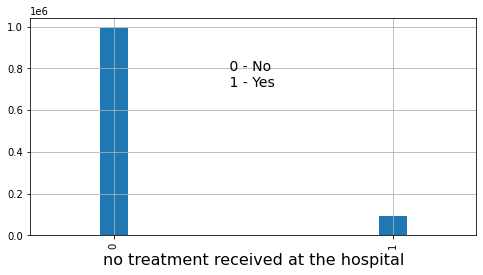

In [98]:
# treatment received at the hospital
none = rhc['nenhum'].value_counts(normalize=False).sort_index(ascending=True)
plt.xlabel('no treatment received at the hospital', fontsize=16)
none.plot.bar(width=0.1,figsize=(8,4))
plt.text(0.4, 710000,' 0 - No\n 1 - Yes', fontsize = 14)
plt.grid()
plt.show()

#### Periods of treatment received at the hospital (before, during, after)

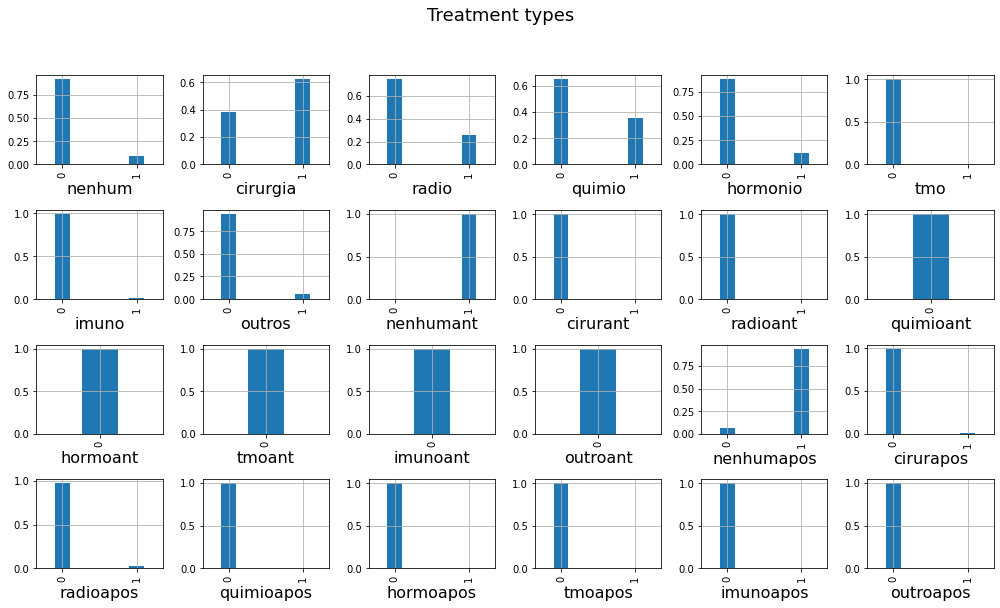

In [99]:
# plot of treatment types
treatments = ['nenhum',     # no treatment at the hospital 
              'cirurgia',   # surgery at the hospital
              'radio',      # radiotherapy at the hospital
              'quimio',     # chemotherapy at the hospital
              'hormonio',   # hormone at the hospital
              'tmo',        # bone marrow transplant at the hospital
              'imuno',      # imunotherapy at the hospital
              'outros',     # other treatments at the hospital
              'nenhumant',  # no treatment before admission
              'cirurant',   # surgery before admission
              'radioant',   # radiotherapy before admission
              'quimioant',  # chemotherapy before admission
              'hormoant',   # hormone before admission
              'tmoant',     # bone marrow transplant before admission
              'imunoant',   # imunotherapy before admission
              'outroant',   # other treatment before admission
              'nenhumapos', # no treatment after admission
              'cirurapos',  # surgery after admission
              'radioapos',  # radiotherapy after admission
              'quimioapos', # chemotherapy after admission
              'hormoapos',  # hormone after admission
              'tmoapos',    # bone marrow transplant after admission
              'imunoapos',  # imunotherapy after admission
              'outroapos'   # other treatments after admission
             ]

fig = plt.figure()
num = 0

fig.suptitle('Treatment types', fontsize=18, y=1.05)

for item in treatments:
    num += 1
    counts = rhc[item].value_counts(normalize=True).sort_index(ascending=True)
    ax = fig.add_subplot(4,6,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=0.2,figsize=(14,8))
    plt.grid()
    
plt.tight_layout()
#plt.savefig('treatments.jpg')
plt.show()

Columns `quimioant`, `hormoant`, `tmoant`, `imunoant`, `outroant` contains only one value and can be removed. 

In [100]:
# counts for the chosen column
rhc.hormoant.value_counts()

0    1085380
Name: hormoant, dtype: int64

#### Year of the last information about the patient

The data increases over the years, as the RHC started to be increasingly fed by data from the participating hospitals in the FOSP network.

In [101]:
# summary for the column ultinfo
rhc.year_ultinfo.describe()

count    1.085380e+06
mean     2.015227e+03
std      5.734540e+00
min      2.000000e+03
25%      2.011000e+03
50%      2.017000e+03
75%      2.020000e+03
max      2.022000e+03
Name: year_ultinfo, dtype: float64

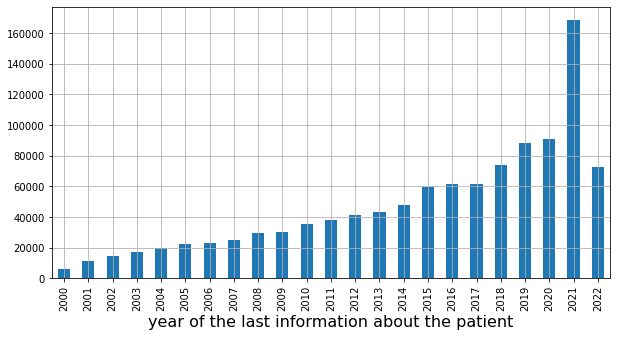

In [102]:
# plot date of last information about the patient
year_ultinfo = rhc['year_ultinfo'].value_counts(normalize=False).sort_index(ascending=True)
plt.xlabel('year of the last information about the patient', fontsize=16)
year_ultinfo.plot.bar(figsize=(10,5))
plt.grid()
plt.show()

#### Last information from the patient

In [103]:
# unique values for ultinfo
rhc.ultinfo.unique()

array([3, 4, 1, 2])

In [104]:
# counts for ultinfo
rhc.ultinfo.value_counts()

2    487089
3    318604
4    158002
1    121685
Name: ultinfo, dtype: int64

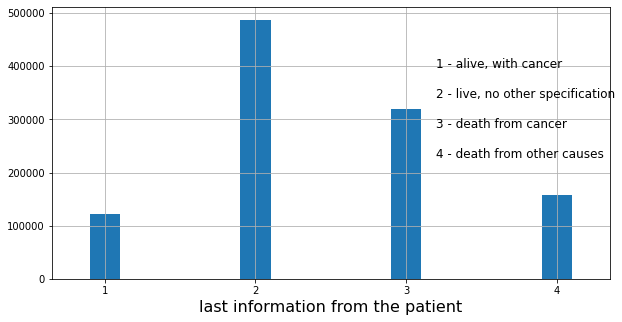

In [105]:
ultinfo = rhc['ultinfo'].value_counts(normalize=False).sort_index(ascending=True)
plt.xlabel('last information from the patient', fontsize=16)
plt.text(2.2, 200000,
'''
1 - alive, with cancer \n
2 - live, no other specification\n
3 - death from cancer \n
4 - death from other causes
''', fontsize = 12)
ultinfo.plot.bar(width=0.2,figsize=(10,5), rot=0)
plt.grid()
plt.show()

#### Time intervals between events

The intervals, in days, are presented for the following events:
* consultation and diagnosis, `consdiag`
* consultation and treatment, `tratcons`
* treatment and diagnosis, `diagtrat` 

In general, the data is well distributed and has a large number of unique values. Because of this and for the sake of clarity, the figure below was prepared considering only values whose presence is greater than 0.5%.

In [106]:
# counts for the interval in days between consultation and diagnosis
rhc.consdiag.value_counts().sort_values(ascending=False)

0.0      180856
1.0       42342
7.0       23635
2.0       19967
14.0      18913
          ...  
871.0         2
990.0         2
926.0         2
886.0         2
976.0         1
Name: consdiag, Length: 1000, dtype: int64

In [107]:
# counts for the interval in days between consultation and treatment
rhc.tratcons.value_counts().sort_values(ascending=False)

0.0      101528
1.0       30089
7.0       16449
14.0      13351
2.0       13318
          ...  
928.0         1
957.0         1
891.0         1
926.0         1
978.0         1
Name: tratcons, Length: 997, dtype: int64

In [108]:
# counts for the interval in days between treatment and diagnosis
rhc.diagtrat.value_counts().sort_values(ascending=False)

0.0      322779
1.0       10356
35.0       7731
42.0       7473
28.0       7441
          ...  
878.0         2
977.0         2
898.0         2
949.0         2
887.0         2
Name: diagtrat, Length: 999, dtype: int64

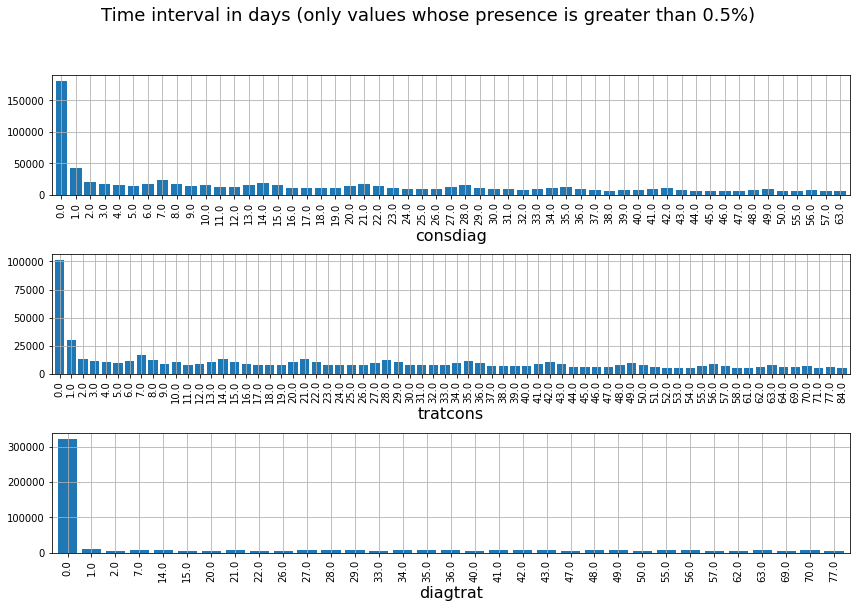

In [109]:
# plot time intervals between events
# only data with more than 0.5 percent of counts is shown 

time_interval = ['consdiag', 'tratcons', 'diagtrat']

fig = plt.figure()
num = 0

fig.suptitle('Time interval in days (only values whose presence is greater than 0.5%)', fontsize=18, y=1.05)

for item in time_interval:
    num += 1
    
    counts = (
    rhc[item]
    .value_counts(normalize=False)[rhc[item]
    .value_counts(normalize=True) > 0.005].sort_index()
    )
    
    ax = fig.add_subplot(3,1,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=0.8,figsize=(12,8), fontsize=10)
    plt.grid()

plt.tight_layout()
#plt.savefig('treatments.jpg')
plt.show()

#### Year of diagnosis

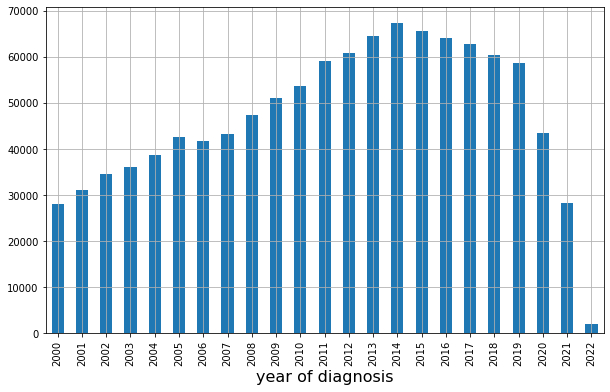

In [110]:
# diagnosis year
rhc['anodiag'].value_counts(normalize=False).sort_index().plot.bar(figsize=(10,6))

plt.xlabel('year of diagnosis', fontsize=16)
plt.grid()
plt.show()

#### Pediatric cancer

For pediatric tumors the International Classification for Childhood Cancer (CICI) is applied.

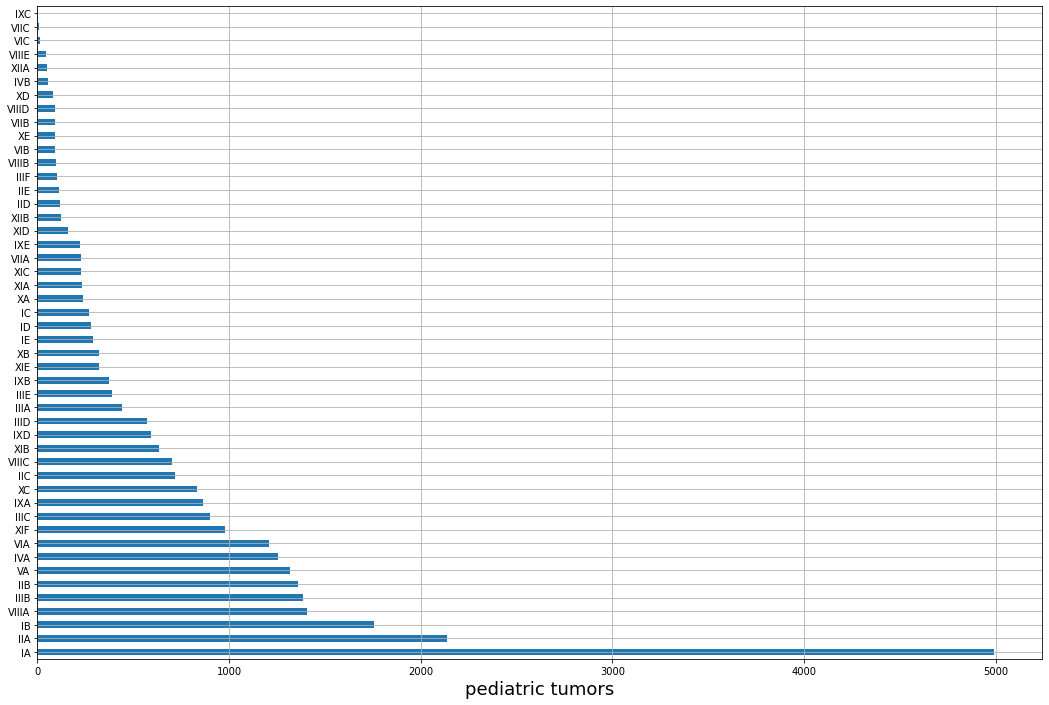

In [111]:
# pediatric cancer 
# The International Incidence of Childhood Cancer (IICC)
rhc.cici.value_counts().plot.barh(figsize=(18, 12))
plt.xlabel('pediatric tumors', fontsize=18)
plt.grid()
plt.show()

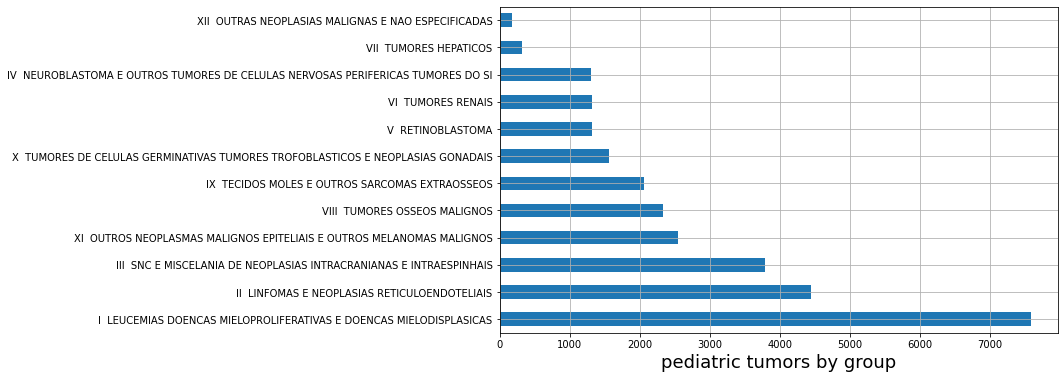

In [112]:
# pediatric cancer by group
# The International Incidence of Childhood Cancer (IICC)
rhc.cicigrup.value_counts().plot.barh(figsize=(10,6))
plt.xlabel('pediatric tumors by group', fontsize=18)
plt.grid()
plt.show()

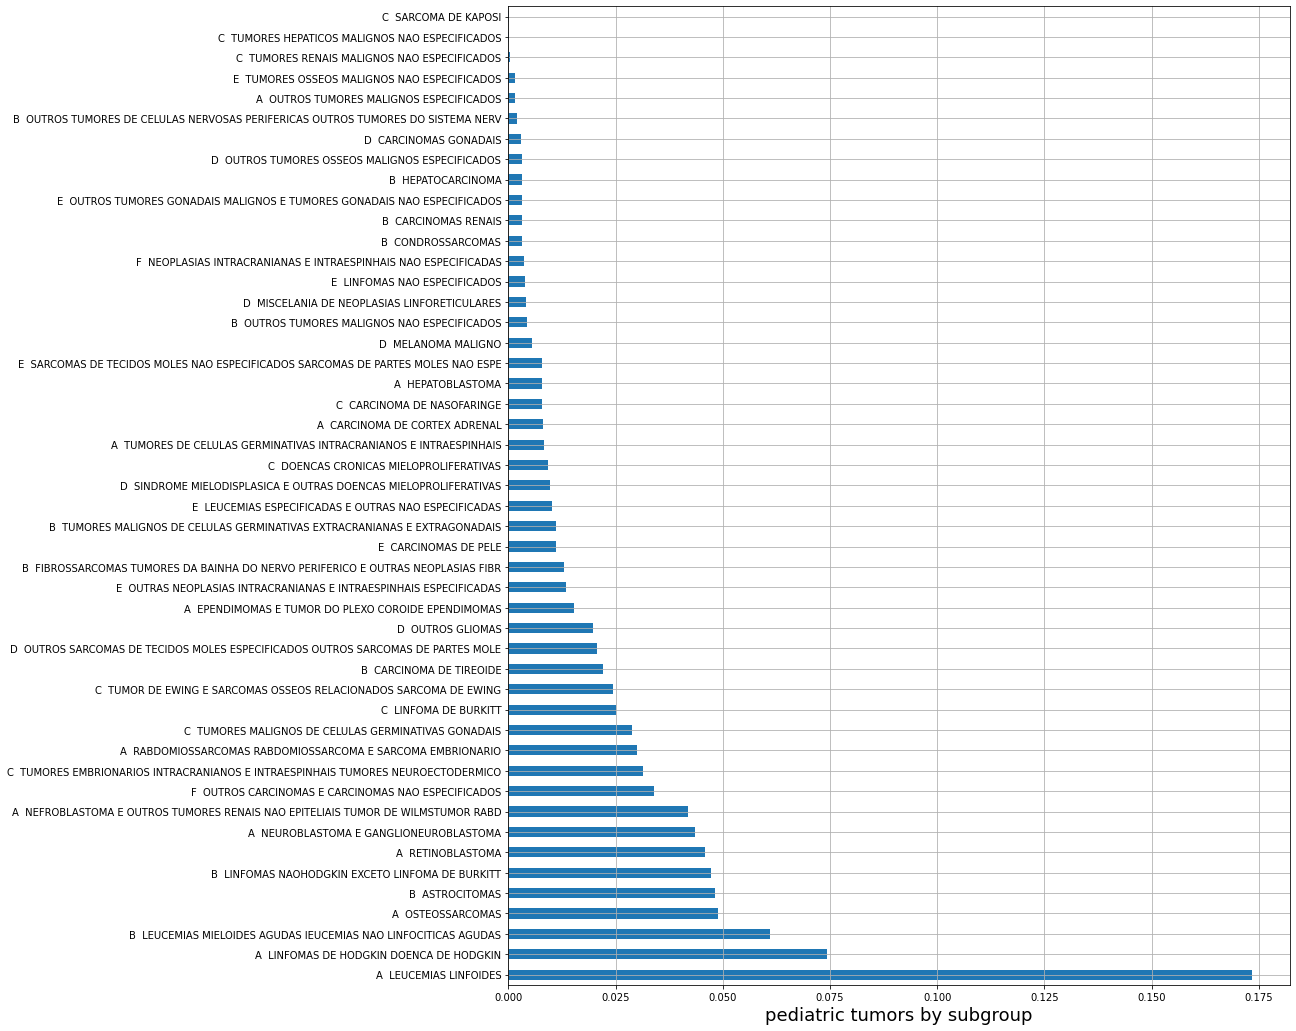

In [113]:
# # pediatric cancer by subgroup
# The International Incidence of Childhood Cancer (IICC)
rhc.cicisubgru.value_counts(normalize=True).plot.barh(figsize=(14,18))
plt.xlabel('pediatric tumors by subgroup', fontsize=18)
plt.grid()
plt.show()

#### Patient's age range

In [114]:
rhc.faixaetar.describe()

count     1085380
unique          8
top           70+
freq       331763
Name: faixaetar, dtype: object

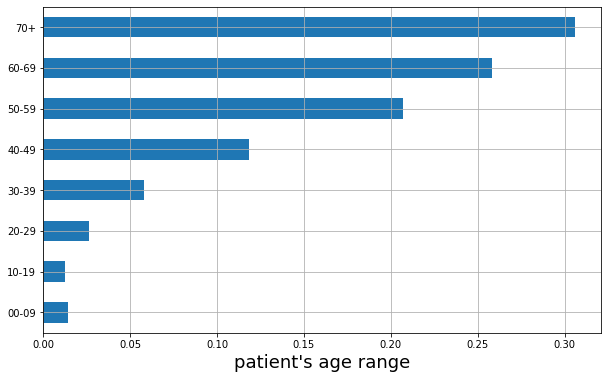

In [115]:
# age range
rhc.faixaetar.value_counts(normalize=True).sort_index().plot.barh(figsize=(10,6))
plt.xlabel("patient's age range", fontsize=18)
plt.grid()
plt.show()

#### Tumor laterality

In [116]:
# counts for tumor laterality 
# rhc.laterali.value_counts()

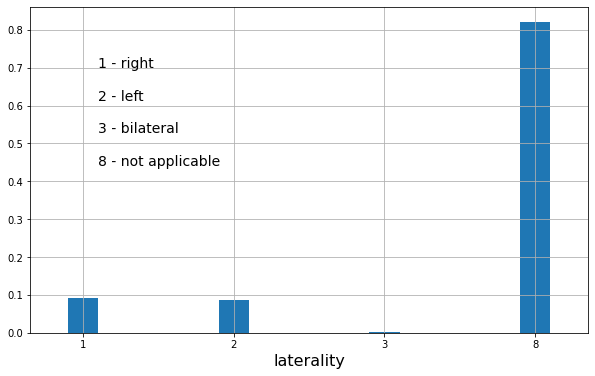

In [117]:
# plot of tumor laterality
laterali = rhc['laterali'].value_counts(normalize=True).sort_index(ascending=True)
plt.xlabel('laterality', fontsize=16)
plt.text(0.1,0.4,
'''
1 - right \n
2 - left \n
3 - bilateral \n
8 - not applicable
''', fontsize = 14)
laterali.plot.bar(width=0.2,figsize=(10,6), rot=0)
plt.grid()
plt.show()

#### Home institution

In [118]:
# home institution
rhc.instorig.describe()

count                  582
unique                 225
top       999999  IGNORADO
freq                   158
Name: instorig, dtype: object

In [119]:
# home institution counts
# rhc.instorig.value_counts()

/home/smv/.virtualenvs/datascience/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


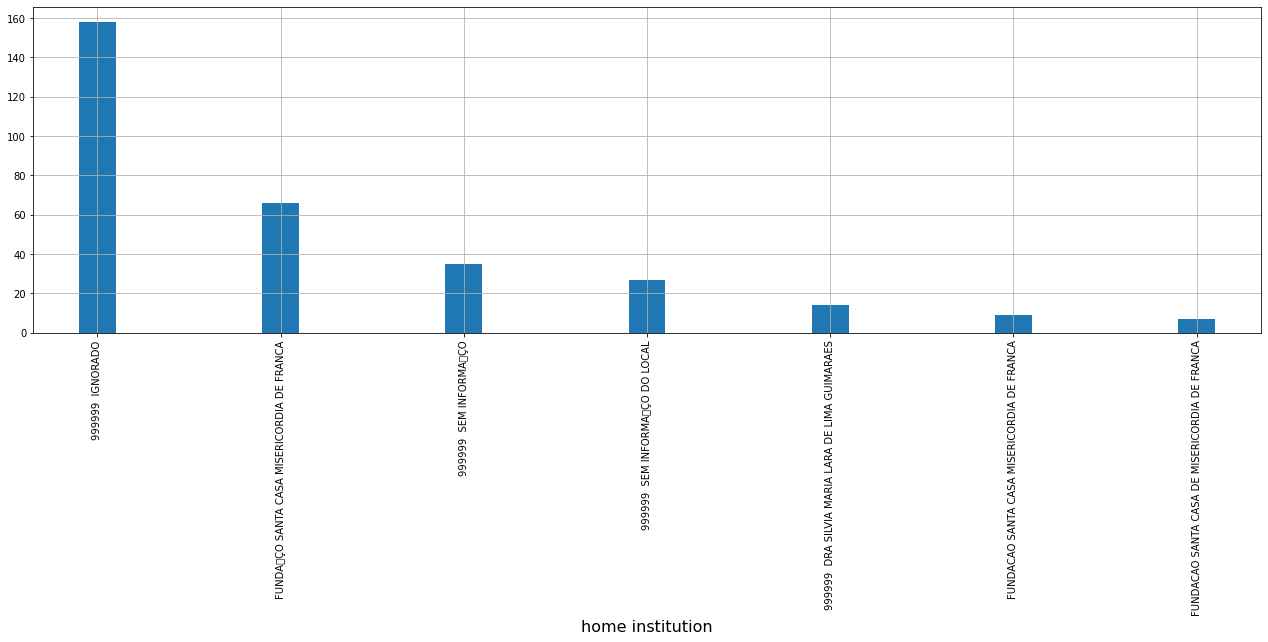

In [120]:
# plot of home institution
instorig =rhc.instorig.value_counts(normalize=False)[rhc.instorig.value_counts(normalize=False) > 5]
plt.xlabel('home institution', fontsize=16)
instorig.plot.bar(width=0.2,figsize=(22,6))
plt.grid()
plt.show()

#### Regional health departments (DRS) of the state of São Paulo

In [121]:
# regional health department, state of Sao Paulo
# rhc.drs.describe()

/home/smv/.virtualenvs/datascience/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 144 (\x90) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/smv/.virtualenvs/datascience/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


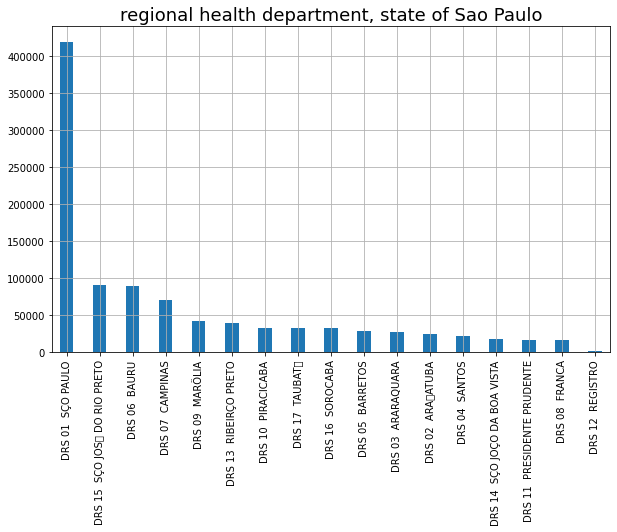

In [122]:
# plot for regional health department, state of Sao Paulo
drs = rhc.drs.value_counts(normalize=False)
plt.title('regional health department, state of Sao Paulo', fontsize=18)
drs.plot.bar(width=0.4,figsize=(10,6))
plt.grid()
plt.show()

#### Regional health care networks (RRAS) in the state of São Paulo

In [123]:
# regional health care networks, state of Sao Paulo
# rhc.rras.describe()

In [124]:
# regional health care networks counts, state of Sao Paulo
# rhc.rras.value_counts(normalize=False)

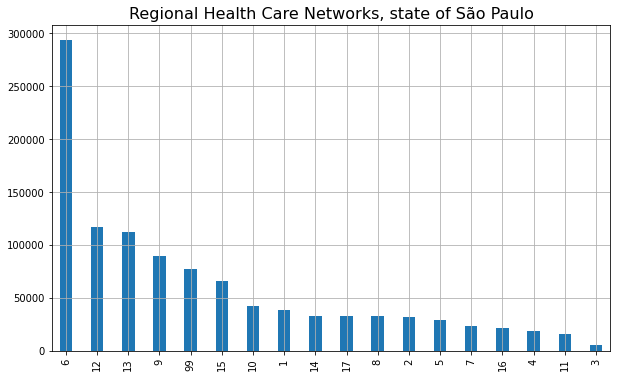

In [125]:
# plot for regional health care networks, state of Sao Paulo
rras = rhc.rras.value_counts(normalize=False)
plt.title('Regional Health Care Networks, state of São Paulo', fontsize=16)
rras.plot.bar(width=0.4,figsize=(10,6))
plt.grid()
plt.show()

#### Loss of patient follow-up

In [126]:
# loss of patient follow-up statistics
rhc.perdaseg.describe()

count    1.085380e+06
mean     1.446949e-01
std      3.517932e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: perdaseg, dtype: float64

In [127]:
# loss of patient follow-up counts
rhc.perdaseg.value_counts(normalize=True)

0    0.855305
1    0.144695
Name: perdaseg, dtype: float64

#### Admission with error

In [128]:
# error
# rhc.erro.describe()

In [129]:
# error counts
rhc.erro.value_counts(normalize=False)

0    1085380
Name: erro, dtype: int64

#### Institution's IBGE code

In [130]:
# institution's IBGE code counts
# rhc.ibgeaten.value_counts()

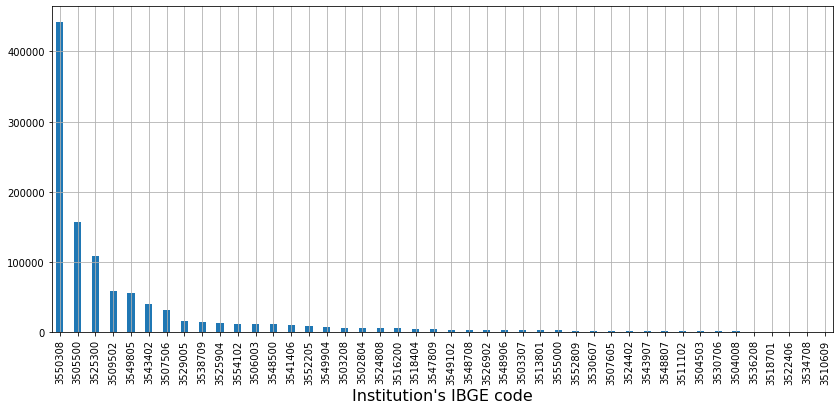

In [131]:
# plot of institution's IBGE code counts
ibgeaten = rhc.ibgeaten.value_counts(normalize=False)
plt.xlabel("Institution's IBGE code", fontsize=16)
ibgeaten.plot.bar(width=0.4,figsize=(14,6))
plt.grid()
plt.show()

#### Relapse

The term **relapse** refers to the return of cancer after undergoing a treatment that aimed to cure it:
* locoregional recurrence (when the disease may return in the same region as the previous tumor)
* metastatic relapse (when the disease manifests itself in another part of the body)

The following columns contain information about relapse:
* `year_recidiva` (date of the last occurrence of recurrence)
* `recnenhum` (with/without recurrence, this is our 'label')
* `reclocal` (local recurrence)
* `recgregio` (regional recurrence)
* `recdist` (distant recurrence/metastasis)

In [132]:
# relapse counts
# rhc.year_recidiva.value_counts()

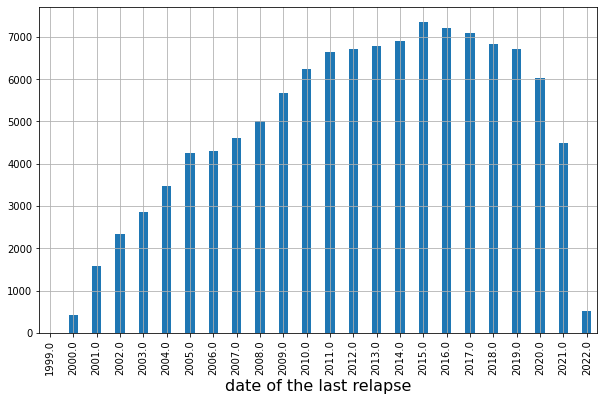

In [133]:
# plot of relapse counts
year_recidiva = rhc.year_recidiva.value_counts(normalize=False)[rhc.year_recidiva.value_counts(normalize=False) < 800000]
plt.xlabel('date of the last relapse', fontsize=16)
year_recidiva.sort_index().plot.bar(width=0.4,figsize=(10,6))
plt.grid()
plt.show()

In [134]:
rhc.year_recidiva.unique()

array([  nan, 2015., 2010., 2011., 2013., 2014., 2009., 2003., 2005.,
       2004., 2002., 2001., 2000., 2008., 2006., 2007., 2022., 2018.,
       2021., 2019., 2016., 2012., 2017., 2020., 1999.])

In [135]:
# relapse yes(0)/no(1)
rhc.recnenhum.value_counts(normalize=True)

1    0.910503
0    0.089497
Name: recnenhum, dtype: float64

The attribute `recnenhum`, representing our label, shows that the dataset presents:
* about 92% of cancer with no recurrence (label 1)
* about 08% of cancer with recurrence (label 0)

As we can see from `recnenhum`, we have an imbalanced dataset. Here it should be noted that we are considering all types of cancer presented in the dataset. However, a better approach would be to separate the dataset by cancer type, represented by the 331 topography codes or by the 70 topography groups, with and without recurrence. Let's try this (please, see the next two figures).  

In [136]:
# create two series containing cancer types with(0)/without(1) recurrence
#recid_0 = rhc['topo'][rhc['recnenhum'] == 0].value_counts()[rhc['topo'][rhc['recnenhum'] == 0].value_counts()>0]
#recid_1 = rhc['topo'][rhc['recnenhum'] == 1].value_counts()[rhc['topo'][rhc['recnenhum'] == 1].value_counts()>0]

recid_0 = rhc['topogrup'][rhc['recnenhum'] == 0].value_counts()[rhc['topogrup'][rhc['recnenhum'] == 0].value_counts()>0]
recid_1 = rhc['topogrup'][rhc['recnenhum'] == 1].value_counts()[rhc['topogrup'][rhc['recnenhum'] == 1].value_counts()>0]

In [137]:
# check unique values
recid_0.index.unique()

Index(['C50', 'C61', 'C44', 'C34', 'C20', 'C53', 'C18', 'C16', 'C42', 'C67',
       'C32', 'C77', 'C56', 'C15', 'C71', 'C54', 'C64', 'C02', 'C22', 'C49',
       'C25', 'C73', 'C01', 'C10', 'C19', 'C80', 'C05', 'C40', 'C06', 'C04',
       'C21', 'C09', 'C41', 'C51', 'C12', 'C48', 'C11', 'C69', 'C13', 'C24',
       'C62', 'C76', 'C17', 'C38', 'C00', 'C07', 'C60', 'C31', 'C74', 'C03',
       'C30', 'C23', 'C52', 'C72', 'C08', 'C14', 'C65', 'C75', 'C55', 'C47',
       'C66', 'C37', 'C57', 'C70', 'C33', 'C68', 'C58', 'C63', 'C26', 'C39'],
      dtype='object')

In [138]:
# check unique values
recid_1.index.unique()

Index(['C44', 'C50', 'C61', 'C34', 'C53', 'C42', 'C16', 'C18', 'C20', 'C73',
       'C77', 'C15', 'C67', 'C64', 'C32', 'C54', 'C80', 'C25', 'C71', 'C56',
       'C22', 'C02', 'C49', 'C10', 'C19', 'C62', 'C01', 'C69', 'C09', 'C76',
       'C05', 'C06', 'C04', 'C40', 'C21', 'C00', 'C13', 'C38', 'C24', 'C17',
       'C51', 'C41', 'C48', 'C11', 'C12', 'C23', 'C60', 'C07', 'C72', 'C31',
       'C74', 'C03', 'C52', 'C30', 'C55', 'C75', 'C14', 'C08', 'C65', 'C47',
       'C37', 'C66', 'C58', 'C26', 'C57', 'C70', 'C68', 'C33', 'C63', 'C39'],
      dtype='object')

In [139]:
# convert series to dataframes
df1 = recid_1.to_frame().reset_index()
df0 = recid_0.to_frame().reset_index()

In [140]:
# visualize dimensions
df0.shape, df1.shape

((70, 2), (70, 2))

In [141]:
# merge dataframes
df01 = pd.merge(df1, df0, on='index')
df01.head()

,index,topogrup_x,topogrup_y
0,C44,241622,5805
1,C50,128954,18473
2,C61,101508,11161
3,C34,46705,4814
4,C53,46249,4363


In [142]:
# rename columns
#df01 = df01.rename(columns={'index':'topo', 'topo_x':'rec1_counts', 'topo_y':'rec0_counts'})
df01 = df01.rename(columns={'index':'topogrup', 'topogrup_x':'rec1_counts', 'topogrup_y':'rec0_counts'})
df01.head()

,topogrup,rec1_counts,rec0_counts
0,C44,241622,5805
1,C50,128954,18473
2,C61,101508,11161
3,C34,46705,4814
4,C53,46249,4363


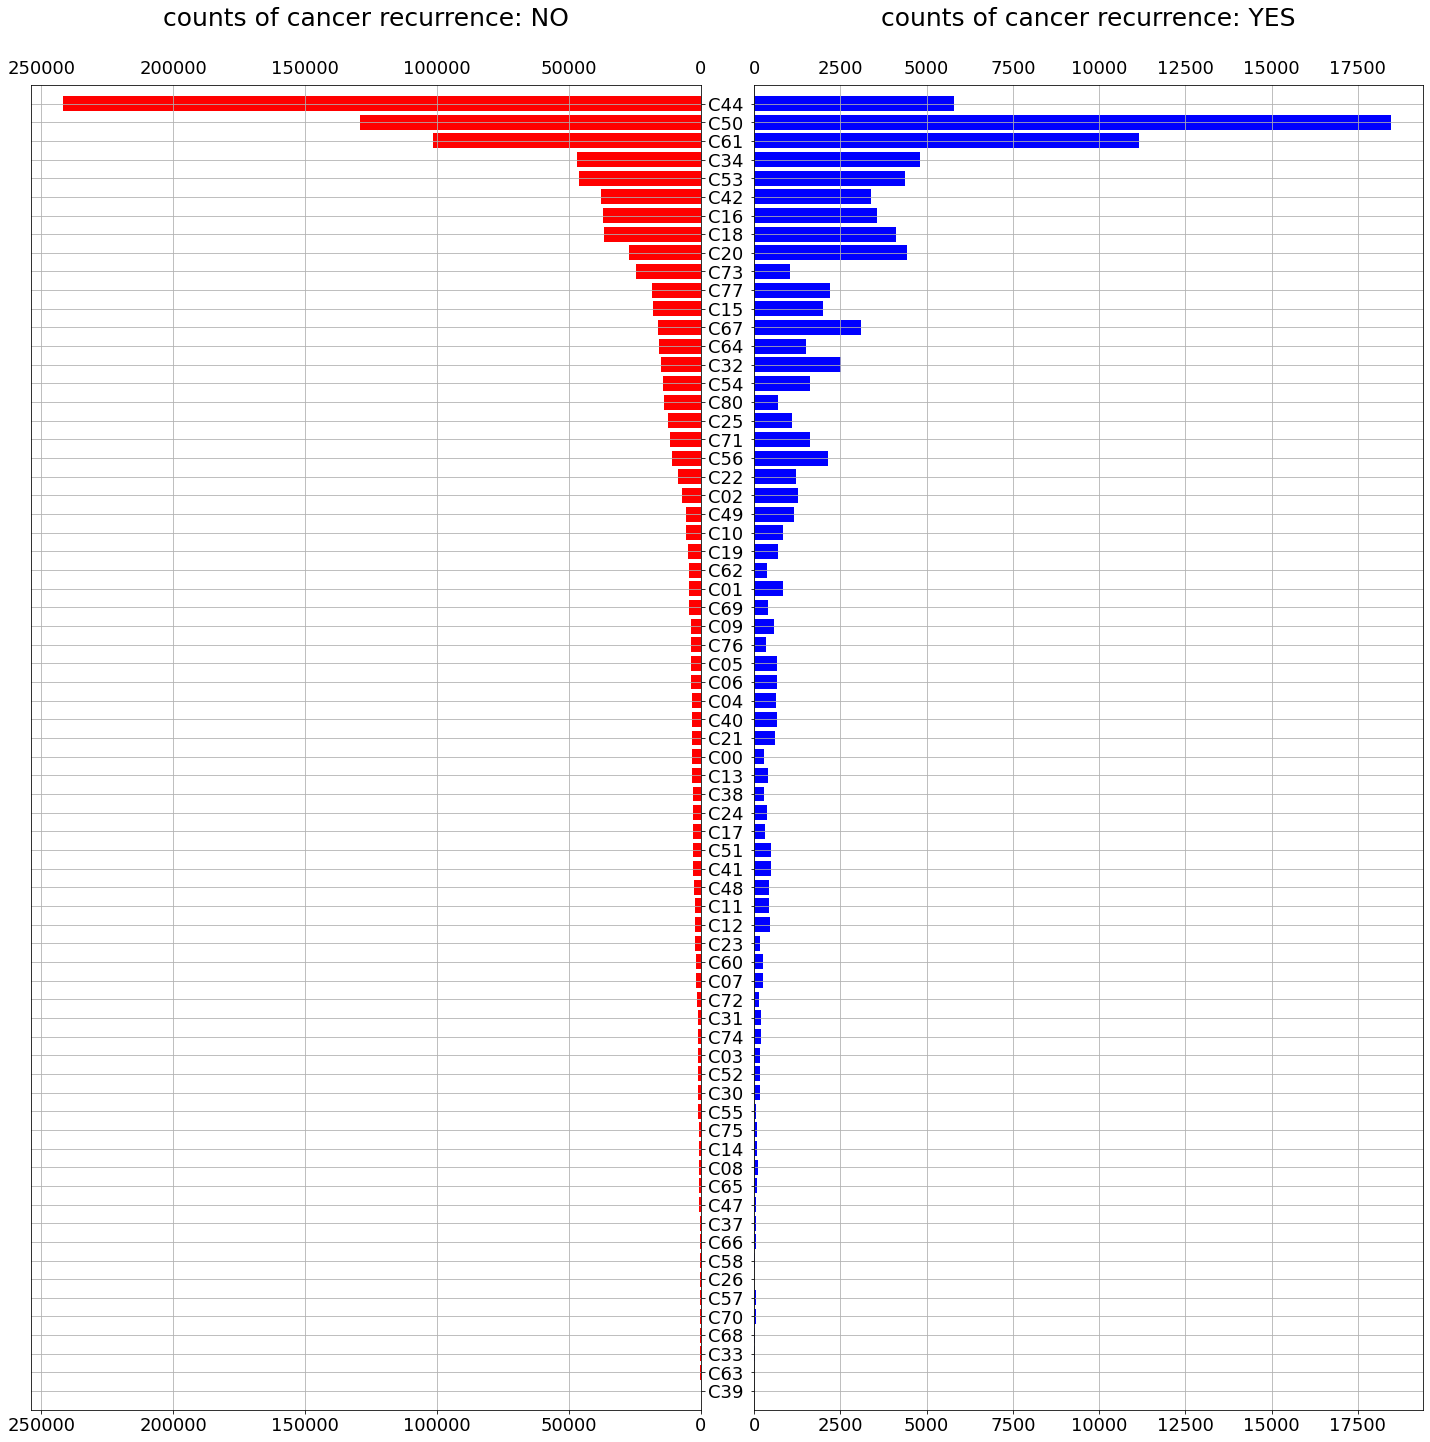

In [143]:
# create a plot considering absolute count values
x0 = df01['rec0_counts']
x1 = df01['rec1_counts']

#y = df01['topo']
y = df01['topogrup']

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(20, 20))
axes[0].barh(y, x1, align='center', color='red')
#axes[0].set(title='No cancer recurrence')
axes[0].set_title('counts of cancer recurrence: NO',fontsize= 25, y=1.04) 
axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].set(yticks=y)
axes[0].yaxis.tick_right()
axes[0].grid()
axes[0].tick_params(axis='both', which='major', labeltop=True, labelsize=18)

axes[1].barh(y, x0, align='center', color='blue')
#axes[1].set(title='Cancer recurrence')
axes[1].set_title('counts of cancer recurrence: YES',fontsize= 25, y=1.04)
axes[1].grid(which='both', axis='both')
axes[1].tick_params(axis='both', which='major', labeltop=True, labelsize=18)

fig.tight_layout()
fig.subplots_adjust(wspace=0.08)
#plt.ylim((311, -1)) # help to remove white space before and after the bars
plt.ylim((70, -1)) # help to remove white space before and after the bars
#plt.savefig(fname='topo_rec.jpg', format='jpeg')
plt.show()

In [144]:
# copy dataframe to create a new plot
df_ratio = df01.copy()
df_ratio.head()

,topogrup,rec1_counts,rec0_counts
0,C44,241622,5805
1,C50,128954,18473
2,C61,101508,11161
3,C34,46705,4814
4,C53,46249,4363


In [145]:
# calculate recurrence percentages
df_ratio['rec_sum'] = df_ratio['rec1_counts'] + df_ratio['rec0_counts']
df_ratio['rec0_ratio'] = (df_ratio['rec0_counts'] / df_ratio['rec_sum']) * 100
df_ratio['rec1_ratio'] = (df_ratio['rec1_counts'] / df_ratio['rec_sum']) * 100

In [146]:
# visualize the percentages
df_ratio.round(1).head()

,topogrup,rec1_counts,rec0_counts,rec_sum,rec0_ratio,rec1_ratio
0,C44,241622,5805,247427,2.3,97.7
1,C50,128954,18473,147427,12.5,87.5
2,C61,101508,11161,112669,9.9,90.1
3,C34,46705,4814,51519,9.3,90.7
4,C53,46249,4363,50612,8.6,91.4


In [147]:
# round the percentage
ratio = df_ratio.round(1)
ratio.head()

,topogrup,rec1_counts,rec0_counts,rec_sum,rec0_ratio,rec1_ratio
0,C44,241622,5805,247427,2.3,97.7
1,C50,128954,18473,147427,12.5,87.5
2,C61,101508,11161,112669,9.9,90.1
3,C34,46705,4814,51519,9.3,90.7
4,C53,46249,4363,50612,8.6,91.4


In [148]:
# show recurrence considering for cases with more than 50000 counts
ratio[ratio['rec1_counts']>50000]

,topogrup,rec1_counts,rec0_counts,rec_sum,rec0_ratio,rec1_ratio
0,C44,241622,5805,247427,2.3,97.7
1,C50,128954,18473,147427,12.5,87.5
2,C61,101508,11161,112669,9.9,90.1


In [149]:
# show recurrence considering cases with more than 16% of recurrence (rare cases in this dataset)
ratio[ratio['rec0_ratio']>16]

,topogrup,rec1_counts,rec0_counts,rec_sum,rec0_ratio,rec1_ratio
19,C56,10745,2142,12887,16.6,83.4
22,C49,5653,1152,6805,16.9,83.1
33,C40,3184,658,3842,17.1,82.9
34,C21,3163,608,3771,16.1,83.9
44,C12,2176,447,2623,17.0,83.0
49,C31,1091,214,1305,16.4,83.6
65,C70,213,44,257,17.1,82.9
67,C33,106,21,127,16.5,83.5


In [150]:
# visualize some limit values for recurrence: more than 1000 datapoints with recurrence greater than 15%
ratio[(ratio['rec1_counts']>1000) & (ratio['rec0_ratio']>15)]

,topogrup,rec1_counts,rec0_counts,rec_sum,rec0_ratio,rec1_ratio
12,C67,16292,3104,19396,16.0,84.0
19,C56,10745,2142,12887,16.6,83.4
21,C02,7041,1267,8308,15.3,84.7
22,C49,5653,1152,6805,16.9,83.1
26,C01,4485,850,5335,15.9,84.1
30,C05,3536,672,4208,16.0,84.0
31,C06,3517,652,4169,15.6,84.4
32,C04,3400,623,4023,15.5,84.5
33,C40,3184,658,3842,17.1,82.9
34,C21,3163,608,3771,16.1,83.9


From the table above we can see that some types of cancer can be less imbalanced than 8%!

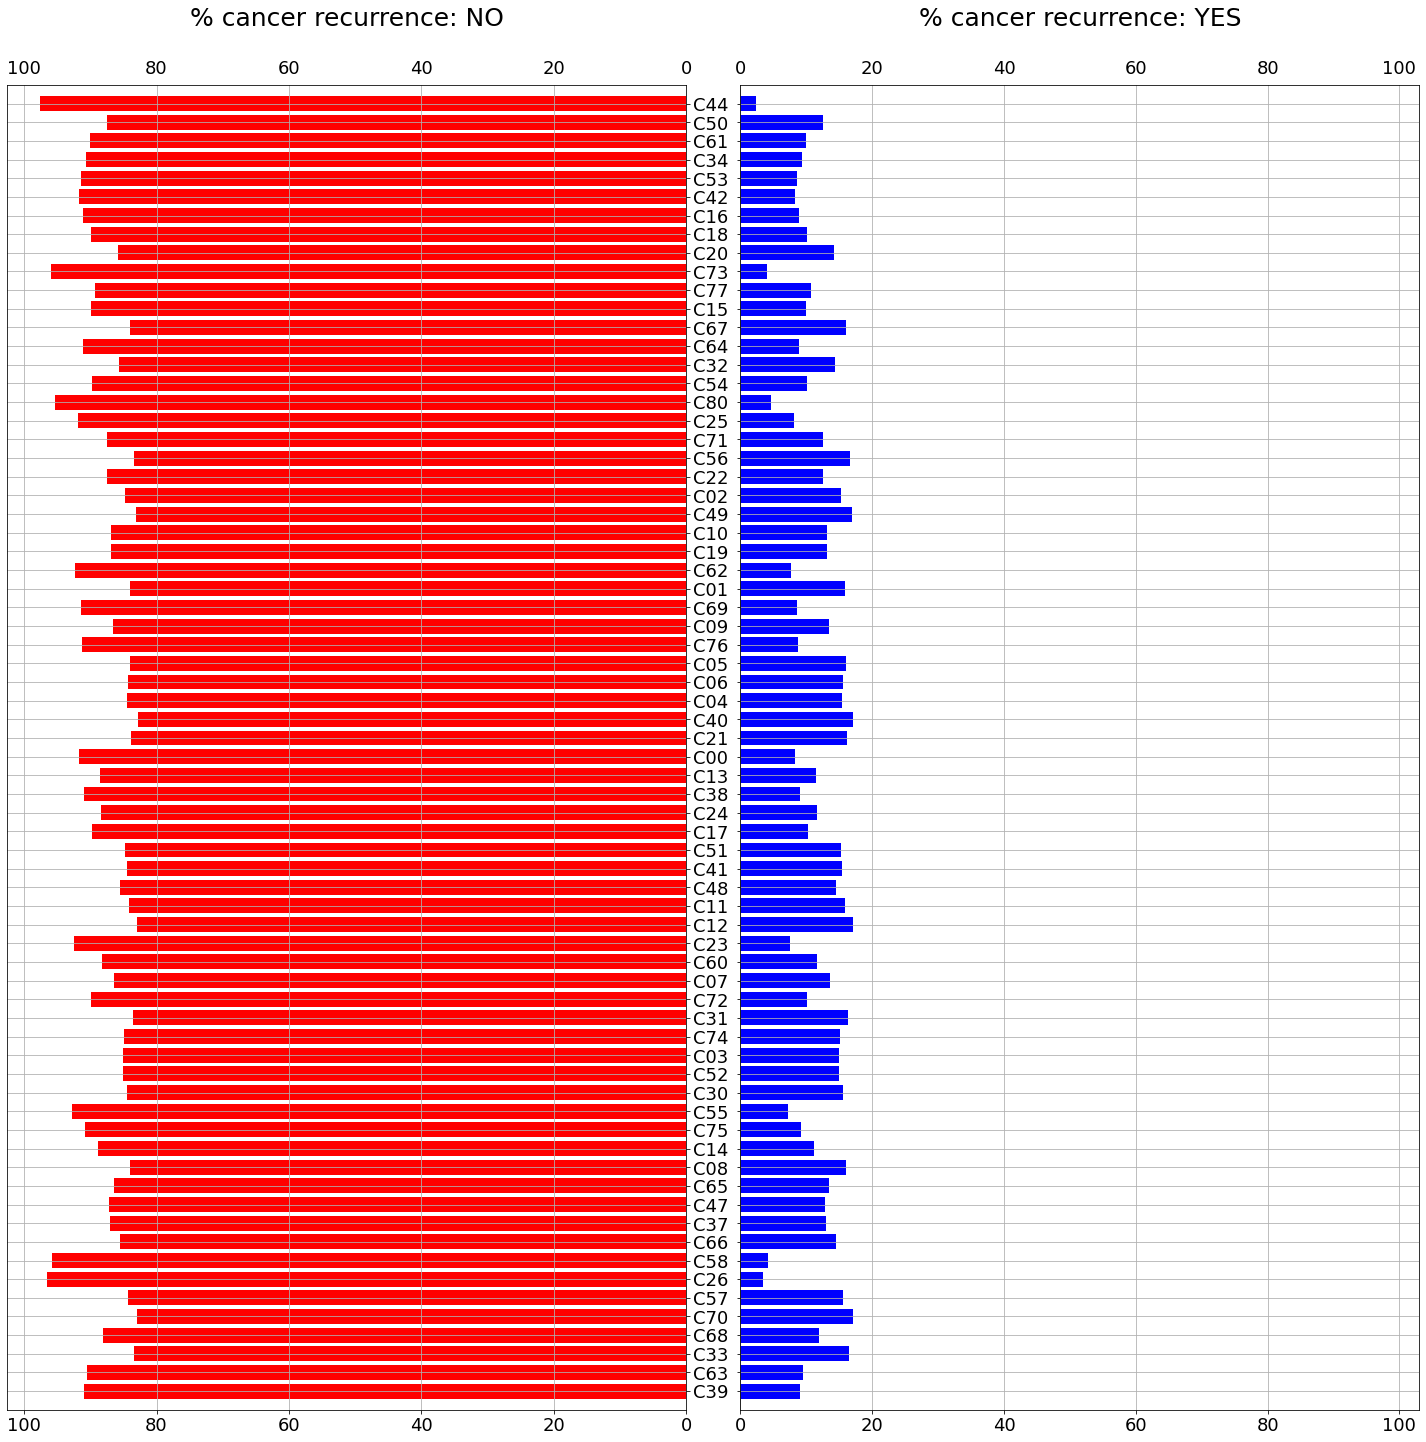

In [151]:
# create a plot considering relative values (%)

x0 = df_ratio['rec0_ratio']
x1 = df_ratio['rec1_ratio']

#y = df_ratio['topo']
y = df_ratio['topogrup']

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(20, 20))
axes[0].barh(y, x1, align='center', color='red')
#axes[0].set(title='No cancer recurrence')
axes[0].set_title('% cancer recurrence: NO',fontsize= 25, y=1.04) 
axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].set(yticks=y)
axes[0].yaxis.tick_right()
axes[0].grid()
axes[0].tick_params(axis='both', which='major', labeltop=True, labelsize=18)

axes[1].barh(y, x0, align='center', color='blue')
#axes[1].set(title='Cancer recurrence')
axes[1].set_title('% cancer recurrence: YES',fontsize= 25, y=1.04)
axes[1].grid(which='both', axis='both')
axes[1].tick_params(axis='both', which='major', labeltop=True, labelsize=18)
plt.xlim((0,103))

fig.tight_layout()
fig.subplots_adjust(wspace=0.08)
#plt.ylim((311, -1)) # help to remove white space before and after the bars
plt.ylim((70, -1)) # help to remove white space before and after the bars
plt.savefig(fname='topo_rec_ratio.jpg', format='jpeg')
plt.show()

The last two plots, comparing differente types of cancer with and without recurrence, show interesting results:
* considering absolute values we can observe cancer types that present more cases
* considering relative values we can see that different types of cancer have different recurrence ratios

These are very general conclusions since this is a very complex subject. However, it indicates that each type of cancer should be treated separately. When looking to the second plot we should have in mind that some cancer types have a very few cases (counts).

In [152]:
# local relapse
rhc.reclocal.value_counts(normalize=True)

0    0.956887
1    0.043113
Name: reclocal, dtype: float64

In [153]:
# regional relapse
rhc.recregio.value_counts(normalize=False)

0    1059918
1      25462
Name: recregio, dtype: int64

In [154]:
# distant relapse / metastasis
rhc.recdist.value_counts(normalize=False)

0    1052833
1      32547
Name: recdist, dtype: int64

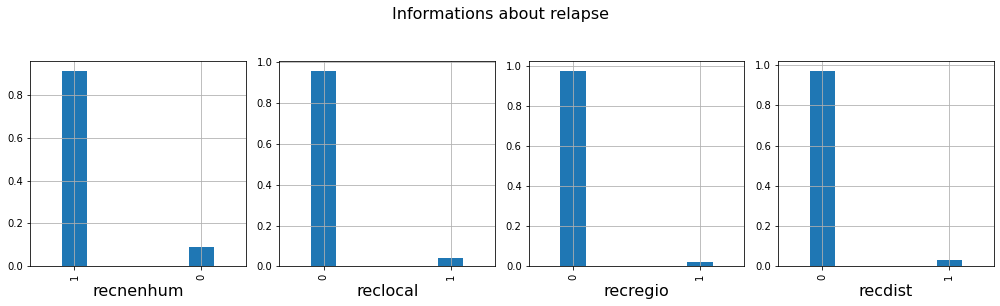

In [155]:
# relapse plots
relapse = ['recnenhum', 'reclocal', 'recregio', 'recdist']

fig = plt.figure()
num = 0

fig.suptitle('Informations about relapse', fontsize=16, y=1.05)


for item in relapse:
    num += 1
    counts = rhc[item].value_counts(normalize=True)
    ax = fig.add_subplot(1,4,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=0.2,figsize=(14,4))
    plt.grid()
#plt.text(0.5, 100000,' O - Nao\n 1 - Sim', fontsize = 10)
plt.tight_layout()
#plt.savefig('treatments.jpg')
plt.show()

#### Relapse/metastasis site

The columns containing this information have the following characteristics:
* `rec01` ( 864082 null values)
* `rec02` ( 905812 null values)
* `rec03` ( 917052 null values)
* `rec04` ( 920771 null values)

In this case, the null values occur because the number of relapses in the dataset is low, probably these null values correspond to cases in which there was no relapse.

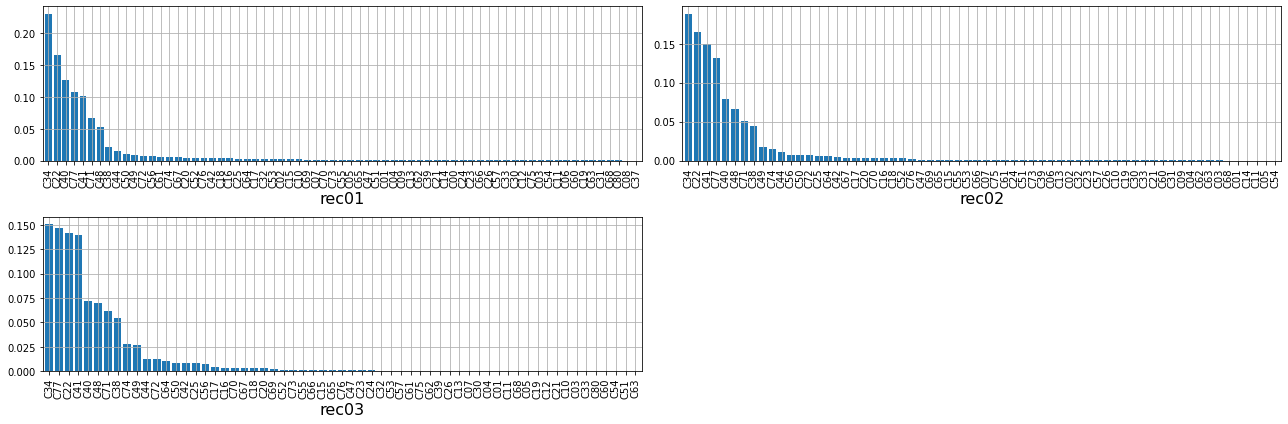

In [156]:
# location of relapse / metastasis
# metastasis = ['rec01', 'rec02', 'rec03', 'rec04'] # in the new dataset rec04 is float --- correct it
metastasis = ['rec01', 'rec02', 'rec03']

fig = plt.figure()
num = 0

for item in metastasis:
    num += 1
    counts = rhc[item].value_counts(normalize=True)
    ax = fig.add_subplot(2,2,num)
    plt.xlabel(item, fontsize=16)
    counts.plot.bar(width=0.8,figsize=(18,6))
    plt.grid()
plt.tight_layout()
plt.show()

In [157]:
# location of relapse / metastasis rec01
rhc.rec01.value_counts(normalize=True).head()

C34    0.230471
C22    0.165607
C40    0.125735
C77    0.107384
C41    0.101097
Name: rec01, dtype: float64

In [158]:
# location of relapse / metastasis rec02
rhc.rec02.value_counts(normalize=False)

C34    4063
C22    3571
C41    3230
C77    2847
C40    1695
C48    1434
C71    1107
C38     959
C49     371
C74     318
C44     246
C56     166
C50     151
C72     149
C25     138
C64     123
C42      95
C67      75
C17      71
C20      66
C70      65
C16      62
C18      62
C52      58
C76      42
C47      27
C69      26
C65      25
C15      24
C55      23
C53      21
C66      17
C07      15
C75      15
C61      15
C24      14
C51      12
C73      11
C39      10
C06      10
C13      10
C02       9
C32       9
C23       9
C57       7
C26       7
C10       7
C19       6
C30       6
C33       6
C21       6
C60       5
C31       5
C09       4
C04       4
C62       4
C63       4
C03       3
C68       2
C01       2
C14       2
C11       2
C05       2
C54       2
Name: rec02, dtype: int64

In [159]:
# # location of relapse / metastasis rec03
rhc.rec03.value_counts(normalize=False)

C34    1087
C77    1059
C22    1023
C41    1006
C40     518
C48     505
C71     442
C38     394
C74     202
C49     191
C44      91
C72      90
C64      78
C50      64
C42      63
C25      58
C56      56
C17      33
C16      26
C70      25
C67      25
C18      22
C20      20
C69      15
C52      12
C73      11
C55      11
C66       9
C15       7
C65       7
C76       6
C47       6
C23       6
C24       5
C32       4
C53       4
C57       4
C61       4
C75       4
C62       3
C39       3
C26       3
C13       3
C07       3
C30       2
C04       2
C01       2
C11       1
C68       1
C05       1
C19       1
C12       1
C21       1
C10       1
C03       1
C33       1
C80       1
C60       1
C54       1
C51       1
C63       1
Name: rec03, dtype: int64

In [160]:
# location of relapse / metastasis rec04
rhc.rec04.value_counts(normalize=False)

Series([], Name: rec04, dtype: int64)

#### International Classification of Diseases for Oncology (CIDO)

In [161]:
# morphology code counts
rhc.cido.value_counts(normalize=False)

80703    171905
81403    148578
85003    106095
80903    103286
85503     74040
          ...  
83003         1
88133         1
87283         1
97623         1
97403         1
Name: cido, Length: 704, dtype: int64

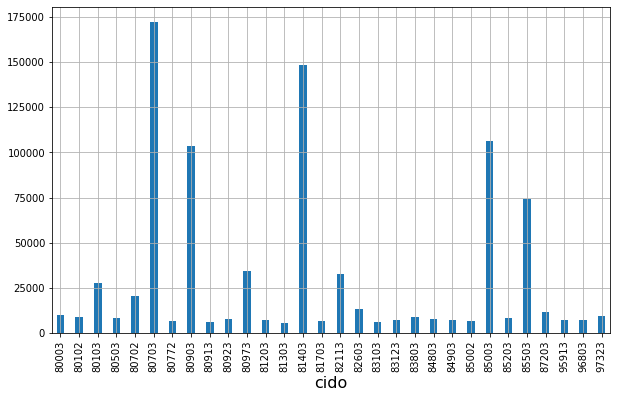

In [162]:
# plot morphology codes
cido = rhc.cido.value_counts(normalize=False)[rhc.cido.value_counts(normalize=True) > 0.005]
plt.xlabel('cido', fontsize=16)
cido.sort_index().plot.bar(width=0.4,figsize=(10,6))
fig.suptitle('International Classification of Diseases for Oncology', fontsize=16, y=1.05)

plt.grid()
plt.show()

In [163]:
# summary of morphology description
rhc.dsccido.describe()

count                         1085380
unique                            704
top       CARCINOMA ESCAMOCELULAR SOE
freq                           171905
Name: dsccido, dtype: object

In [164]:
# morphology description counts
rhc.dsccido.value_counts(normalize=False).head(20)

CARCINOMA ESCAMOCELULAR SOE               171905
ADENOCARCINOMA SOE                        148578
CARCINOMA DUCTAL INFILTRANTE SOE          106095
CARCINOMA BASOCELULAR SOE                 103286
CARCINOMA DE CELULAS ACINOSAS              74040
CARCINOMA BASOCELULAR NODULAR              34268
ADENOCARCINOMA TUBULAR                     32423
CARCINOMA SOE                              27701
CARCINOMA ESCAMOCELULAR IN SITU SOE        20628
ADENOCARCINOMA PAPILAR SOE                 13173
MELANOMA MALIGNO SOE                       11656
NEOPLASIA MALIGNA                          10007
MIELOMA MULTIPLO                            9318
ADENOCARCINOMA ENDOMETRIOIDE SOE            8967
CARCINOMA IN SITU SOE                       8705
CARCINOMA PAPILAR SOE                       8437
CARCINOMA LOBULAR SOE                       8097
CARCINOMA BASOCELULAR INFILTRATIVO SOE      7747
ADENOCARCINOMA MUCINOSO                     7616
CARCINOMA DE CELULAS TRANSICIONAIS SOE      7496
Name: dsccido, dtype

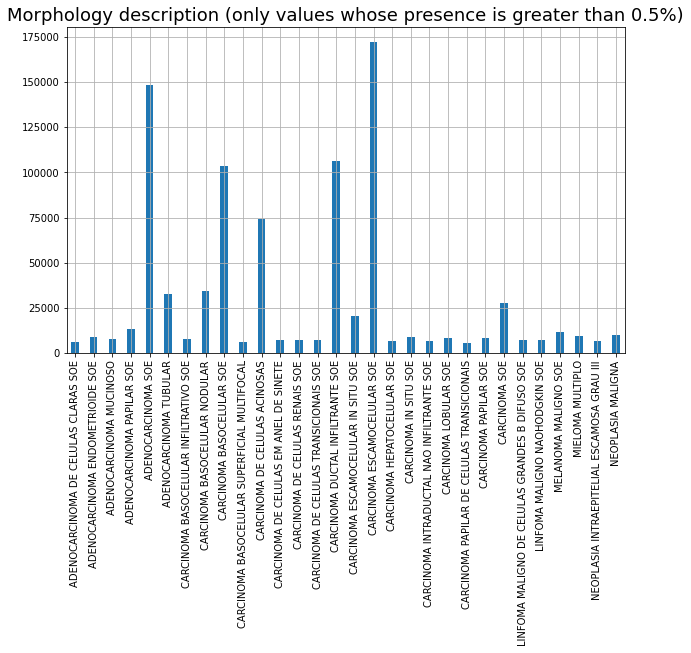

In [165]:
# plot of morphology description counts, only entries with more than 0.5% of counts
dsccido = rhc.dsccido.value_counts(normalize=False)[rhc.dsccido.value_counts(normalize=True) > 0.005]
plt.title('Morphology description (only values whose presence is greater than 0.5%)', fontsize=18)
dsccido.sort_index().plot.bar(width=0.4,figsize=(10,6))
plt.grid()
plt.show()